# Итоговый проект по программе "Специалист по Data Science"

## Тема: Определение вероятности покупки товара на основе данных о клиенте и его покупательской истории с помощью методов машинного обучения

**Цель проекта:** Продемонстрировать освоение ключевых методов анализа данных и их приминение на практике на основе задачи определения вероятности совершения покупки на основе данных о клиенте и его покупательской истории


**Задачи проекта:** 
1. Провести предобработку и исследовательский анализ данных полученного датасета
2. Составить портрет покупателя
3. Провести кластеризацию покупателей
4. Выбрать и обучить модель определения вероятности покупки товара


**Исходные данные:**
* Датасет ["Superstore Marketing Campaign Dataset"](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset)

**Содержание отчета:**
* 1. Загрузка датасета и знакомство с данными
* 2. Предобработка данных
     * 2.1 Типы данных
     * 2.2 Пропуски данных
     * 2.3 Дубликаты данных
     * 2.4 Дообогащение данных
     * 2.5. Выводы по предобработке данных
* 3. Исследовательский анализ данных
* 4. Портрет покупателя
* 5. Кластеризация покупателей
* 6. Выбор и обучение модели для определения вероятности покупки товара
* 7. Общие выводы по результатам работы

## 1. Загрузка датасета и знакомство с данными

Задачи данного раздела:
* Импортировать необходимые библиотеки
* Загрузить датасет
* Ознакомиться с общей информацией о датасете

Импортируем необходимые библиотеки:

In [1]:
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns

# Машинное обучение
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

# Настройка отображения Jupiter
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # вывод результатов без сокращения количества столбцов

Загрузим датасет:

In [2]:
data = pd.read_csv('superstore_data.csv')

Откроем датасет и посмотрим на данные:

In [3]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


Посмотрим общую информацию о датасете:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

В датасете содиржится меформация о 2240 клиентов с 22 признаками. К датасету прилагалось следующее описание:

* ``Id`` - уникальный идентификатор клиента
* ``Year_Birth`` - год рождения клиента
* ``Education`` - уровень образования клиента
* ``Marital_Status`` - семейное положение клиента
* ``Income`` - годовой доход домохозяйства клиента
* ``Kidhome`` - количество маленьких детей у клиента
* ``Teenhome`` - количество детей-подростков 
* ``Dt_Customer`` - дата регистрации клиента
* ``Recency`` - количество дней с последней покупки
* ``MntWines`` - сумма, потраченная на вино за последние два года
* ``MntFruits`` -  сумма, потраченная на фрукты за последние два года
* ``MntMeatProducts`` -  сумма, потраченная на мясо за последние два года
* ``MntFishProducts`` -  сумма, потраченная на рыбу за последние два года
* ``MntSweetProducts`` -  сумма, потраченная на сладости за последние два года
* ``MntGoldProds`` -  сумма, потраченная на "золотые продукты" за последние два года. "Золотые продукты" - это продукты, размещаемые на "золотой полке" — это полка, расположенная на уровне глаз покупателей, на высоте от 1,2 до 1,7 метра от пола (с учётом среднего роста взрослого человека). В детских магазинах золотая полка находится на уровне от 0,3 до 1 метра от пола. 
* ``NumDealsPurchases`` - количество покупок со скидкой
* ``NumWebPurchases`` - количество покупок совершенных на сайте компании
* ``NumCatalogPurchases`` - количество покупок, совершенных с помощью каталога (покупка товаров, которые должны быть отправлены по почте)
* ``NumStorePurchases`` - количество покупок совершенных непосредственно в магазине
* ``NumWebVisitsMonth`` - количество посещений сайта компании за последний месяц
* ``Response`` - ответ клиента (целевая переменная), 1 - клиент принял предложение о покупке, 0 - не принял
* ``Complain`` - жалобы клиента, 1 - жалобы были, 0 - жалоб не было

## 2. Предобработка данных

Исходя из проведенного обзора данных необходимо выполнить:
* Привести наименование столбцов к общепринятому виду
* Привести типы данных в соответствие
* Проверить пропуски в датасете
* Проверить наличие явных и неявных дубликатов
* По возможности дообогатить данные
* Удалить столбцы не несущие смысла для дальнейшего анализа

### 2.1. Приведение названий столбцов к нижнему регистру

Для дальнейшего удобства приведем названия столбцов к нижнему регистру:

In [5]:
data.columns = data.columns.str.lower()

### 2.2. Приведение типов данных к целевым

Поле ``dt_сustomer`` содержит дату регистрации клиента и  представлена в строковом виде.

Преобразуем `dt_Customer` к типу даты:

In [6]:
data['dt_customer'] = pd.to_datetime(data['dt_customer'])

В остальных полях типы данных указаны корректно.

### 2.3. Обработка пропусков данных

Проверим наличие NAN и NULL в датасете:

In [7]:
print(20*'==')
print('NULLS')
print(data.isnull().sum())
print(20*'==')
print('NANs')
print(data.isna().sum())
print(20*'==')

NULLS
id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
response                0
complain                0
dtype: int64
NANs
id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurcha

Обнаружено 24 пропуска по полю Income. 

Выведем долю пропущенных значений:

In [8]:
print(f'Доля пропущенных данных в датасете: {data.query('income.isna()').shape[0] / data.shape[0] * 100:.2f}%')

Доля пропущенных данных в датасете: 1.07%


Заполнять пропуски не будем, удалим пропущенные значения (1% - допустимый уровень потерь при предобработке данных), чтобы не искажать данные, что может негативно повлиять на обучение моделей в дальнейшем. Результат сохраним в новый датафрейм с очищенными данными.

Создадим новый датафрейм в котором будут храниться очищенные данные для дальнейшей работы:

In [9]:
df = data.dropna()

### 2.4. Обработка дубликатов данных

Проверим количество явных дубликатов (полностью одинаковых строк):

In [10]:
df.duplicated().sum()

0

Явных дубликатов (полных совпадений) не обнаружено.

К неявным дубликатам могут относиться например варицации написания одной и той категории - лишние пробелы, ошибки в написании, разные регистры и т.д.

Проверим наличие неявных дубликатов по столбцу `education`:

In [11]:
df['education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

В поле ``education`` ошибок нет.

Дадим пояснения по обозначениям уровней образования:
* Graduation - выпускник средней школы или колледжа / бакалавр
* PhD - доктор философии (высшая академическая степень)
* 2n Cycle - получение степени магистра (Болонская система)
* Master - магистр, степень следующая за обучение после бакалавриата
* Basic - базовое образование (начальная / средняя школа)

Проверим уникальные значения по полю `year_birth`:

In [12]:
df['year_birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900])

Видим аномальные значения - 1893, 1899, 1900.

Удалим аномалии, оставим в датасете только клиентов с годом рождения > 1900:

In [13]:
df = df.query('year_birth>1900').copy()

Проверим наличие неявных дубликатов по столбцу `marital_status`:

In [14]:
df['marital_status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

В поле `marital_status` ошибок нет.

Дадим пояснения по обозначениям статусов семейного положения:
* Divorced - разведен
* Single - человек, который не состоит в браке и не имеет партнёра
* Married - женат / замужем
* Together - человек состоит в отношениях с другим человеком (без заключения брака)
* Widow - вдова
* YOLO - You Only Live Once - человек предпочитающий не связывать себя серьезными отношениями
* Alone - человек, который не находится в отношениях и предпочитает проводить время в одиночестве, это может быть связано с выбором или обстоятельствами. 
* Absurd - "все сложно"

Также проверим наличие неявных дубликатов по связке полей `year_birth`, `education`, `marital_status`, `income` - основным полям 
помимо id, по которым можно идентифицировать похожих клиентов:

In [15]:
df.duplicated(subset=['year_birth', 'education', 'marital_status', 'income']).sum()

201

Найден 201 дубликат, посмотрим на найденные совпадения:

In [16]:
dubls = df[df.duplicated(subset=['year_birth', 'education', 'marital_status', 'income'], keep=False)]
dubls.head(20)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,0,102,21,32,5,3,6,2,9,4,0,0
15,837,1977,Graduation,Married,54809.0,1,1,2013-11-09,0,63,6,57,13,13,22,4,2,1,5,4,0,0
16,10521,1977,Graduation,Married,54809.0,1,1,2013-11-09,0,63,6,57,13,13,22,4,2,1,5,4,1,0
26,5430,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,171,8,19,32,12,9,2,8,8,0,0
27,8432,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,171,8,19,32,12,9,2,8,8,0,0
68,1519,1972,PhD,Single,38578.0,1,1,2013-06-22,2,38,4,22,3,3,3,3,3,0,3,8,1,0
69,9080,1972,PhD,Single,38578.0,1,1,2013-06-22,2,38,4,22,3,3,3,3,3,0,3,8,0,0
80,9888,1969,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,356,106,50,40,1,4,4,7,2,0,0
81,4399,1969,Graduation,Together,68695.0,0,0,2014-06-25,3,458,81,356,106,50,40,1,4,4,7,2,0,0


По найденным данным действительно видно, что строки повторяются полностью, отличие только в id клиента. Это может говорить о технической ошибке при сборе данных или регистрации клиентов.

Удалим найденные дубликаты из очищенного датасета:

In [17]:
df = df.drop_duplicates(subset=['year_birth', 'education', 'marital_status', 'income'])

Проверим изменение объема данных относительно первоначального датасета:

In [18]:
print(f'Изменение объема данных: {(df.shape[0] / data.shape[0] * 100) - 100 :.2f}%')

Изменение объема данных: -10.18%


В результате выполненной предобработки, объем данных сократился на 10%, что является умеренным уровнем потерь.

### 2.4. Дообогащение данных

С учетом имеющихся данных дообогатим датасет следующими признаками:
* возраст клиента на момент регистрации в программе лояльности
* признак общего количества детей
* обобщенный признак наличия детей
* общая сумма покупок по основным товарным категориям
* сумма покупок в расчете на одного члена семьи
* общее количество покупок по разным каналам
* средний чек покупки (общая сумма / общее кол-во покупок)

Добавим поле с возрастом клиента на момент регистрации в программе лояльности:

In [19]:
df['registration_age'] = df['dt_customer'].dt.year - df['year_birth']

Добавим поле с общим количеством детей:

In [20]:
df['children_total'] = df['kidhome'] + df['teenhome']

Добавим поле с обобщенным признаком наличия детей 1 - дети есть, 0 - детей нет:

In [21]:
df['is_parent'] = df.apply(lambda x: 1 if (x['kidhome'] > 0 or x['teenhome'] > 0) else 0, axis=1)

Добавим поле с общей суммой покупок в основных товарных категориях (без золотой полки, т.к. сумма может задублироваться):

In [22]:
df['mnt_total'] = (
    df['mntwines'] +
    df['mntfruits'] +
    df['mntmeatproducts'] + 
    df['mntfishproducts'] +
    df['mntsweetproducts']
)

Далее, чтобы добавить признак суммы покупки на одного члена семьи, напишем функцию, которая в зависимости от семейного положения и количества детей будет рассчитывать суммы всех покупок на одного члена семьи:

In [27]:
def get_expenses_on_member(row):
    adults = 1
    if row['marital_status'] in ['Married' 'Together']:
        adults += 1
    return row['mnt_total'] / (adults + row['children_total'])

Добавим столбец с суммой покупок в расчете на каждого члена семьи:

In [28]:
df['expenses_per_member'] = df.apply(get_expenses_on_member, axis=1)

Добавим поле с общим количеством покупок (без покупок по скидке, чтобы не было задвоения по каналам):

In [29]:
df['total_purchases'] = (
    df['numwebpurchases'] +
    df['numcatalogpurchases'] +
    df['numstorepurchases']
)

Добавим поле со средним чеком покупки:

In [30]:
df['avg_check'] = np.where(df['total_purchases'] != 0, 
                        df['mnt_total'] / df['total_purchases'], 
                        0)

Проверим полученный результат:

In [31]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain,registration_age,children_total,is_parent,mnt_total,expenses_per_member,total_purchases,avg_check
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,44,0,0,972,972.000000,14,69.428571
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,53,0,0,540,540.000000,17,31.764706
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,56,1,1,221,110.500000,10,22.100000
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,1,0,0,0,1,1,0,2,7,0,0,47,2,1,11,3.666667,3,3.666667
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,24,11,0,34,2,3,1,2,7,1,0,25,1,1,57,28.500000,6,9.500000


Все 6 новых признаков добавлены.

Так как поле с идентификатором клиента не несет никакой смысловой нагрузки, мы его удалим из очищенного датасета:

In [32]:
df = df.drop(columns='id')

### 2.5. Выводы по предобработке данных

В результате выполненной предобработки:
* Поле `dt_customer` приведено к типу даты
* Удалено 24 записи с пропусками по полю income
* Удален 201 дубликат, обнаружена ошибка с задвоенными записями и разными идентификаторами пользователей, что могло быть связано с технической ошибкой при сборе данных или при регистрации клиентов.
* Удалены три записи с аномальным годом рождения клиента (<1900 года)
* Объем данных сократился на 10% (умеренные потери)
* Добавлены шесть новых признаков:
    * `registration_age` - возраст клиента на момент регистрации в программе лояльности
    * `is_parent` - обобщенный признак наличия детей
    * `mnt_total` - общая сумма покупок по основным товарным категориям
    * `expenses_per_member` - сумма покупок в расчете на каждого члена семьи
    * `total_purchases` - общее количество покупок по разным каналам
    * `avg_check` - средний чек покупки (общая сумма / общее кол-во покупок)

## 3. Исследовательский анализ данных

Для переиспользования повторяющегося кода напишем функцию для выода описательной статистики и инфографики при проведении исследовательского анализа данных.

Напишем функцию для описания категориальных признаков:

In [33]:
def describe_feature(feature, data=df, kind='numeric', discrete=True, bins=50):
    '''
    Функция предназначена для формирования описательной статистики данных
    Принимает на вход:
        - feature - название колонки,
        - data - наименование датасета, в котором находится feature. По умолчанию - df
        - kind - тип данных (numeric - численные (по умолчанию), categorical - категориальные
        - discrete - дискретность данных (для численных признаков) - по умолчанию True
    Возвращает стобчатую диаграмму с распределением признаков, а также общую статистику по полю:
        - Среднее
        - Медиана
        - Минимум и максимум
        - Уникальные значения
    '''
    # Формируем описание для численных данных
    if kind=='numeric':
        # Визуализация для дискретных данных
        if discrete:
            fig = go.Figure(data=[go.Bar(x=data[feature].value_counts().index,
                                         y=data[feature].value_counts().values)])
            
            # Настройка заголовка и меток осей
            fig.update_layout(
                title=f'Распределение значений по полю {feature}',
                xaxis_title='Значение',
                yaxis_title='Количество',
                width=400,  # Ширина графика в пикселях
                height=350  # Высота графика в пикселях
                )
            fig.show()

            print(feature)
            print(20*'=')
            print(f'Среднее: {data[feature].mean():.3f}')
            print(f'Min: {data[feature].min():.3f}')
            print(f'Max: {data[feature].max():.3f}')
            print('Уникальные значения:')
            print(data[feature].unique())
            print(20*'=')

        # Визуализация распределения для численных непрерывных данных
        else:
            fig = make_subplots(rows=1, cols=2, 
            subplot_titles=(f'Диаграмма размаха {feature}', f'Гистограмма распределения {feature}'))
    
            fig.add_trace(go.Box(x=data[feature], name='Диаграмма размаха'), row=1, col=1)
    
            fig.add_trace(go.Histogram(x=data[feature], 
                                 nbinsx=bins,
                                 histnorm='probability density',
                                 opacity=0.75, 
                                 name='Гистограмма распределения'), row=1, col=2)
    
            fig.show()

            print(feature)
            print(20*'=')
            print(f'Среднее: {data[feature].mean():.3f}')
            print(f'Медиана: {data[feature].median():.3f}')
            print(f'Ст. откл-е: {data[feature].std():.3f}')
            print(f'Min: {data[feature].min():.3f}')
            print(f'Max: {data[feature].max():.3f}')
            print(20*'=')
    

    
    # Формируем описание для категориальных нечисловых данных
    if kind=='categorical':
        # Визуализация
        fig = go.Figure(data=[go.Bar(x=data[feature].value_counts().index,
                                     y=data[feature].value_counts().values)])
        
        # Настройка заголовка и меток осей
        fig.update_layout(
            title=f'Распределение значений по полю {feature}',
            xaxis_title='Значение',
            yaxis_title='Количество',
            width=400,  # Ширина графика в пикселях
            height=350  # Высота графика в пикселях
            )
        # Отображение графика
        fig.show()
        
        print(feature)
        print(20*'=')
        print('Уникальные значения:')
        print(data[feature].unique())
        print(20*'=')

### 3.1. Описательная статистика данных

### 3.1.1. Признак `response`

Выведем описательную статистику признака `response`:

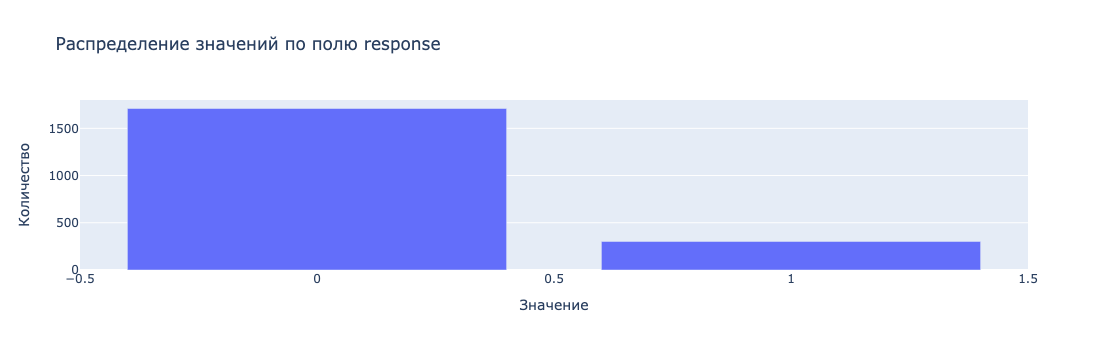

response
Среднее: 0.150
Min: 0.000
Max: 1.000
Уникальные значения:
[1 0]


In [34]:
describe_feature('response')

`response` - категориальный бинарный признак, указывающий принял ли клиент предложение о покупке - целевая переменная на основе которой предстоит предсказывать вероятность совершения покупки. Согласно полученным данным, только 15% клиентов совершили покупку при получении предложения. Также видим, что датасет не сбалансирован по целевой переменной - 85% данных принадлежит к одному классу.

### 3.1.2. Признак `year_birth`

Выведем описательную статистику признака `year_birth`:

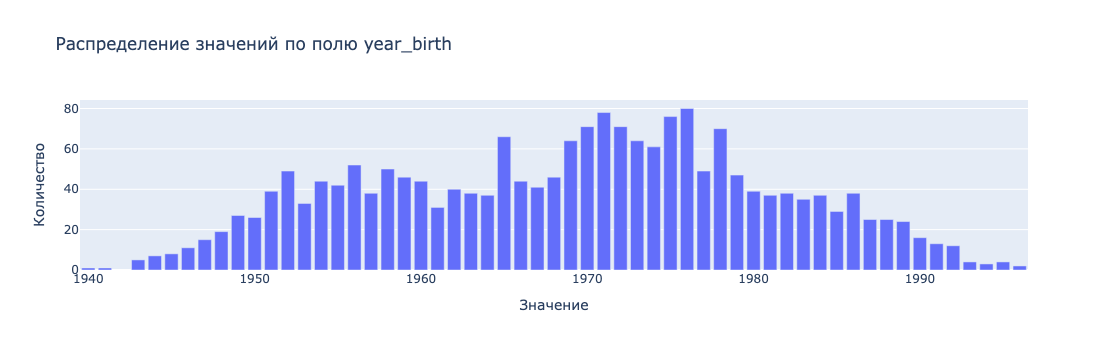

year_birth
Среднее: 1968.890
Min: 1940.000
Max: 1996.000
Уникальные значения:
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1996 1995 1943 1941 1940]


In [35]:
describe_feature('year_birth')

`year_birth` - дискретный численный признак, указывающий на год рождения клиента. Самый старший клиент родился в 1946 году, самый младший в 1996 г. Основная часть данных находится в диапозоне 1952-1980 г. На распределении видно два пика - в районе 1956 и 1970 года.

### 3.1.3. Признак `education`

Выведем описательную статистику признака `education`:

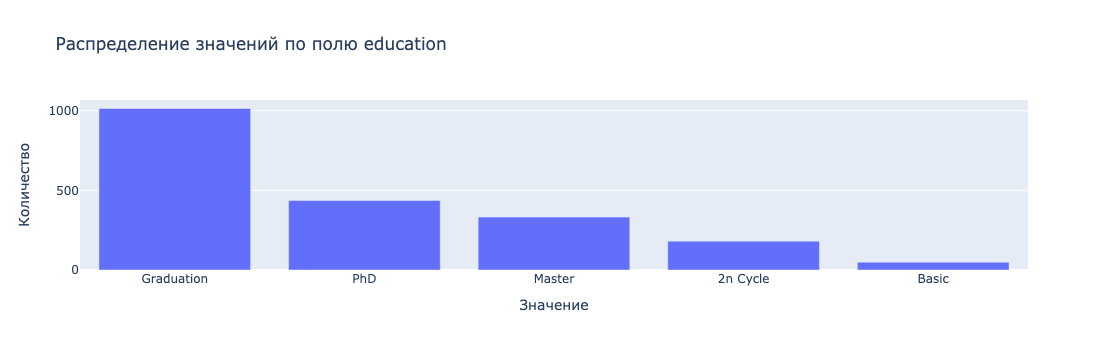

education
Уникальные значения:
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [36]:
describe_feature('education', kind='categorical')

`education` - категориальный признак указывающий на уровень образования клиента. Представлен пятью уникальными категориями. Большая часть данных приходится на категорию Graduation (1014 клиентов) - выпускники средней школы или колледжа / бакалавры. Вторая по популярности категория - PhD (436 клиентов) - говорит о наличии высшей академической степени. Меньше всего клиентов с базовым уровнем образования (49).

### 3.1.4. Признак `marital_status`

Выведем описательную статистику признака `marital_status`:

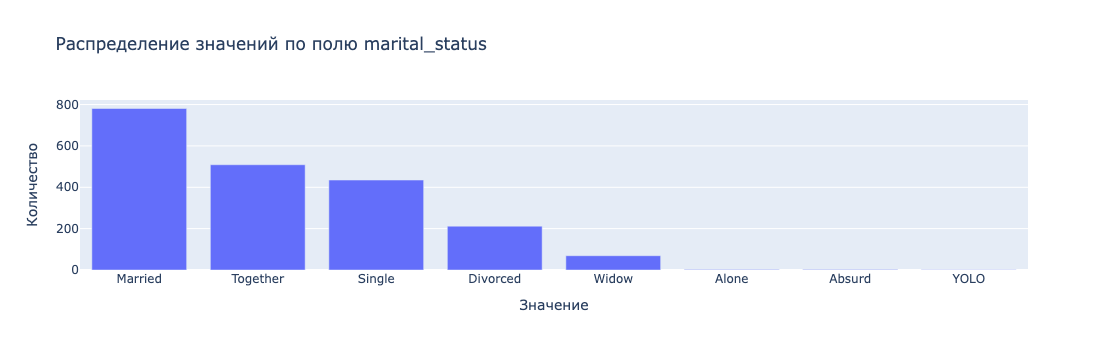

marital_status
Уникальные значения:
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [37]:
describe_feature('marital_status', kind='categorical')

`marital_status` - категориальный признак, указывающий на семейное положение клиента. Больше всего в датасете представлено клиентов: 
* находящихся в браке (781 человек),
* состоящих в отношениях (509 человек),
* не состоящих в отношениях (435 человек).

Самые малочисленные категории: Alone, Absurd и YOLO.

### 3.1.5. Признак `income`

Выведем описательную статистику признака `income`:

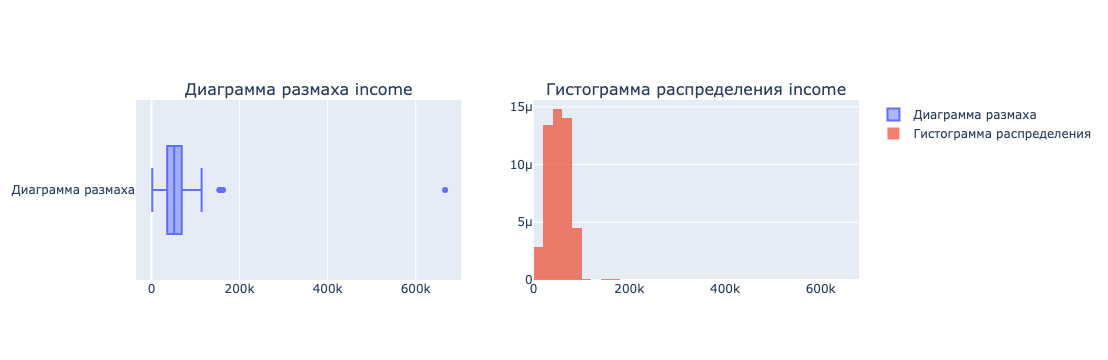

income
Среднее: 52350.452
Медиана: 51533.000
Ст. откл-е: 25587.312
Min: 1730.000
Max: 666666.000


In [38]:
describe_feature('income', discrete=False)

`income` - численный непрерывный признак, содержащий информацию о годовом доходе домохозяйства клиента.
Доходы клиентов варьируются от 1730 до 667 тыс. долларов в год. На гистограмме видно, что основная часть данных находится в диапозоне 20-80 тыс. Медианный доход - 51.5 тыс долл./год, средний доход выше медианного за счет наличия нескольких экстремальных значений. Годовой доход 75% клиентов не превышает 68.6 тыс. долл.

Проверим данные с экстремальными значениями по уровню дохода:

In [39]:
df.query('income>150000')

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain,registration_age,children_total,is_parent,mnt_total,expenses_per_member,total_purchases,avg_check
325,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,36,0,0,1729,1729.0,28,61.750000
497,1982,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,30,0,0,1713,1713.0,29,59.068966
527,1977,Graduation,Together,666666.0,1,0,2013-02-06,23,9,14,18,8,1,12,4,3,1,3,6,0,0,36,1,1,50,25.0,7,7.142857
731,1976,PhD,Together,162397.0,1,1,2013-03-06,31,85,1,16,2,1,2,0,0,0,1,1,0,0,37,2,1,105,35.0,1,105.000000
853,1971,Master,Together,157733.0,1,0,2013-04-06,37,39,1,9,2,0,8,0,1,0,1,1,0,0,42,1,1,51,25.5,2,25.500000
1826,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,1,1,1,1,1,0,0,0,0,0,0,0,39,0,0,5,5.0,0,0.000000
1925,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,64,0,0,7,7.0,0,0.000000
2204,1973,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,41,1,1,1607,803.5,22,73.045455


Из данных видно, что большинство клиентов с очень высоким уровнем дохода имеют ученые степени PhD и Master, примерно одного возраста (за исключением одного) и в целом нет причин полагать, что в данном случае есть ошибка в данных. На данном этапе удалять экстремальные значения не будем.

### 3.1.6. Признак `kidhome`

Выведем описательную статистику признака `kidhome`:

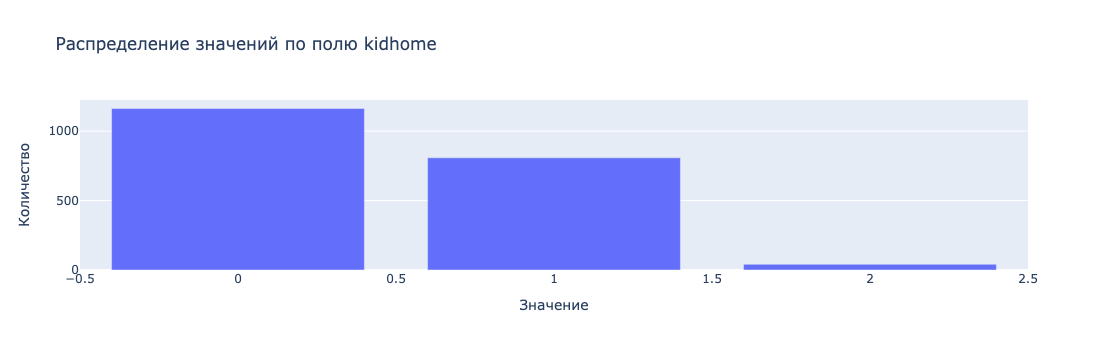

kidhome
Среднее: 0.442
Min: 0.000
Max: 2.000
Уникальные значения:
[0 1 2]


In [40]:
describe_feature('kidhome')

`kidhome` - дискретный численный признак количества маленьких детей у клиента. Больше всего клиентов без маленьких детей - 1163, 808 клиента имеют одного маленького ребенка, и всего 41 клиент - 2 маленьких ребенка.

### 3.1.7. Признак `teenhome`

Выведем описательную статистику признака `teenhome`:

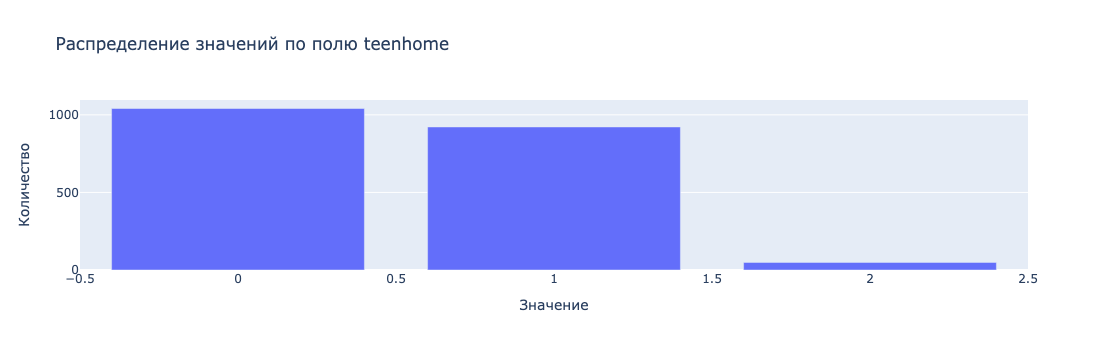

teenhome
Среднее: 0.507
Min: 0.000
Max: 2.000
Уникальные значения:
[0 1 2]


In [41]:
describe_feature('teenhome')

`teenhome` - дискретный численный признак количества детей-подростков у клиента. Распределение похоже на показатель наличия маленьких детей. Больше всего клиентов без детей подростков - 1041, 922 клиента имеют одного ребенка-подростка, и всего 49 клиентов - 2 ребенка-подростка.

### 3.1.8. Признак `children_total`

Выведем описательную статистику признака `children_total`:

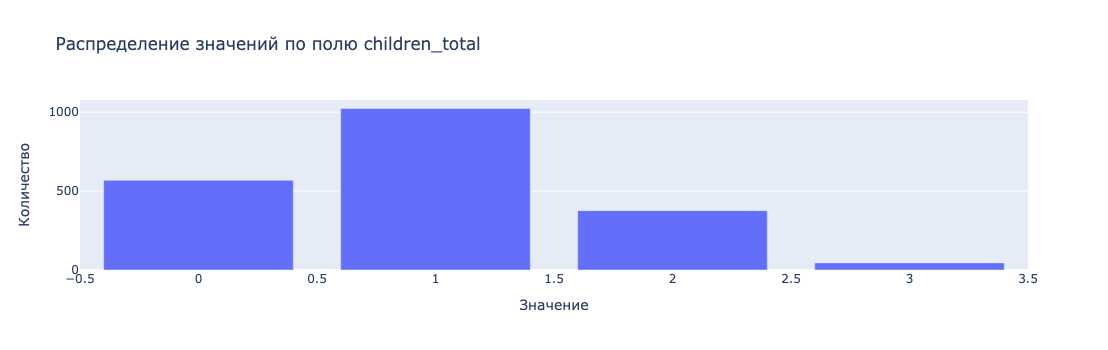

children_total
Среднее: 0.949
Min: 0.000
Max: 3.000
Уникальные значения:
[0 1 2 3]


In [42]:
describe_feature('children_total')

`children_total` - дискретный численный признак общего количества детей у клиентов, добавленный при обогащении данных. Больше всего клиентов, имеющих одного ребенка (1023), на втором месте клиенты без детей - 568, три ребенка - самое редкое явление - всего 45 клиентов

### 3.1.9. Признак `is_parent`

Выведем описательную статистику признака `is_parent`:

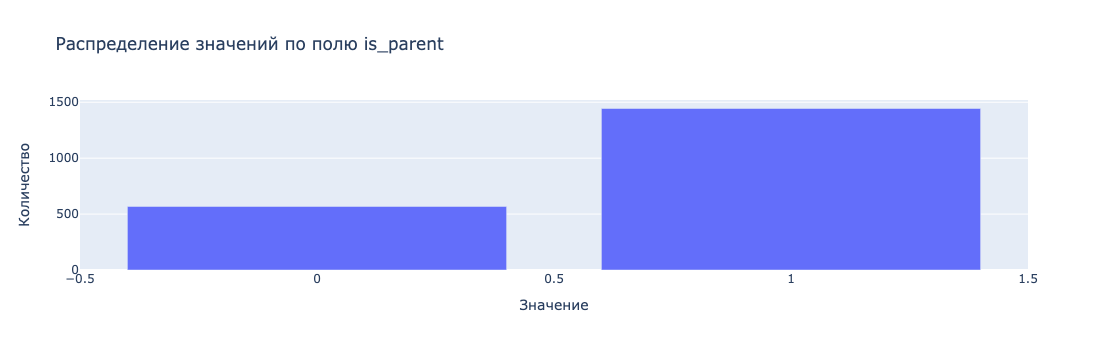

is_parent
Среднее: 0.718
Min: 0.000
Max: 1.000
Уникальные значения:
[0 1]


In [43]:
describe_feature('is_parent')

`is_parent` - бинарный категориальный признак добавленный на этапе обогащения данных, сообщающий есть ли дети у клиента или нет. 72% клиентов являются родителями.

### 3.1.10. Признак `recency`

Выведем описательную статистику признака `recency`:

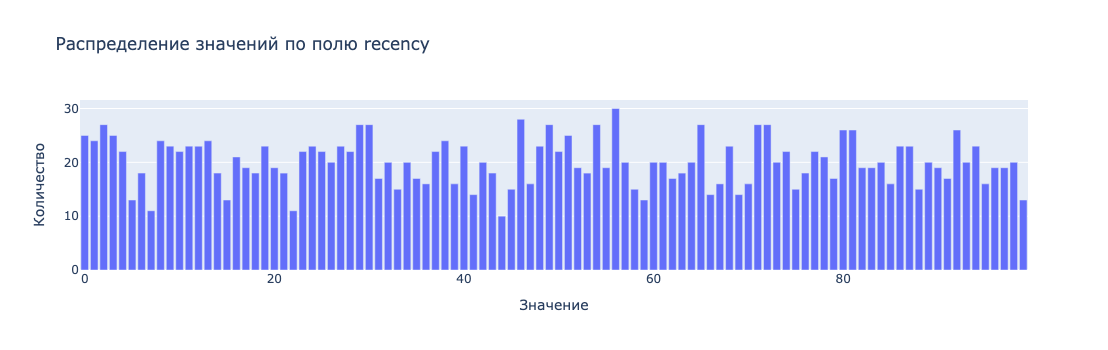

recency
Среднее: 48.985
Min: 0.000
Max: 99.000
Уникальные значения:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [44]:
describe_feature('recency')

`recency` - дискретный численный признак, показывающий количество дней прошедших с последней покупки. Показатель варьируется от 0 до 99 дней, по распределению нельзя сказать что есть какие-то ярко выраженные пики, распределение относительно равномерное.

### 3.1.11. Признак `complain`

Выведем описательную статистику признака `complain`:

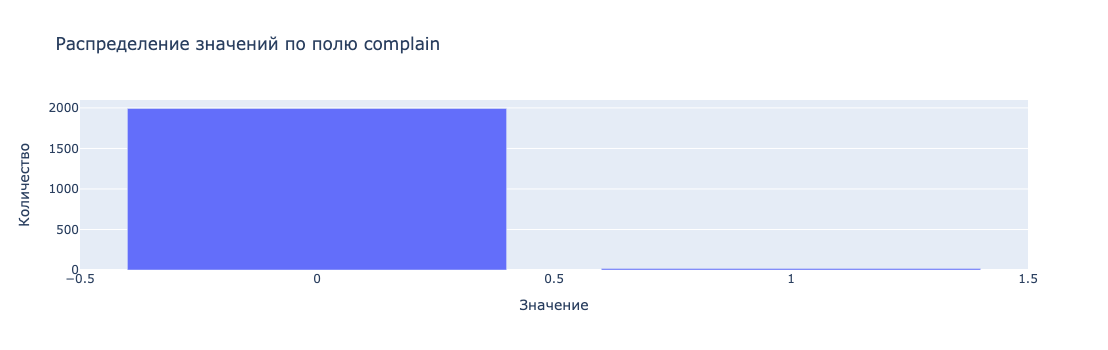

complain
Среднее: 0.009
Min: 0.000
Max: 1.000
Уникальные значения:
[0 1]


In [45]:
describe_feature('complain')

`complain` - бинарный категориальный признак, указывающий на факт жалоб со стороны клиента. Клиентов, которые направляли жалобы всего 19 человек (менее 1%). Скорее всего с учетом данного распределения, такой признак не несет особой пользы при обучении моделей в дальнейшем, по сути это нулевой столбец.

### 3.1.12. Признак `mntwines`

Выведем описательную статистику признака `mntwines`:

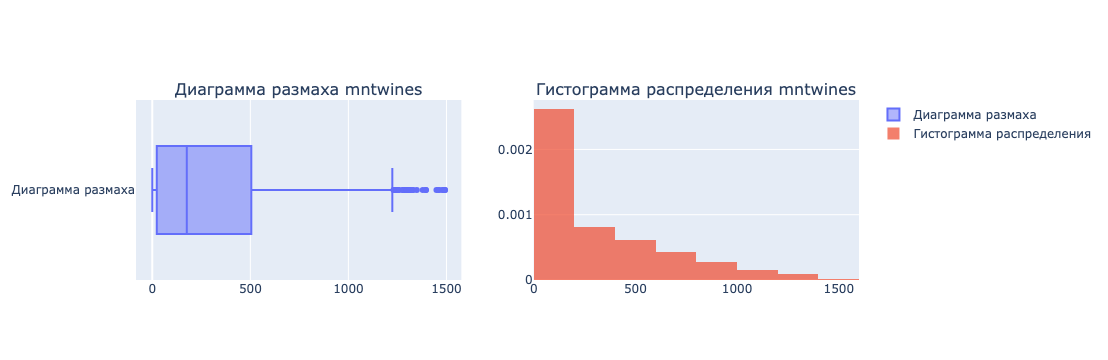

mntwines
Среднее: 304.664
Медиана: 176.000
Ст. откл-е: 336.596
Min: 0.000
Max: 1493.000


In [46]:
describe_feature('mntwines', discrete=False, bins=10)

`mntwines` - численный непрерывный признак, содержащий информацию о сумме потраченной на вино за последние два года. Распределение скошено вправо, основная часть значений находится в диапозоне 0-199 долл. Среднее значение значительно превышает медианное за счет наличия большого количества экстремальных значений (выбросы после отметки 1230 долл.) Медианный уровень трат на вино - 176 долл. за два года. Максимальные траты на вино - 1493 долл. за два года. Также видно, что есть небольшое количество покупателей, которые тратят на вино значительно больше, чем средний покупатель.

### 3.1.13. Признак `mntfruits`

Выведем описательную статистику признака `mntfruits`:

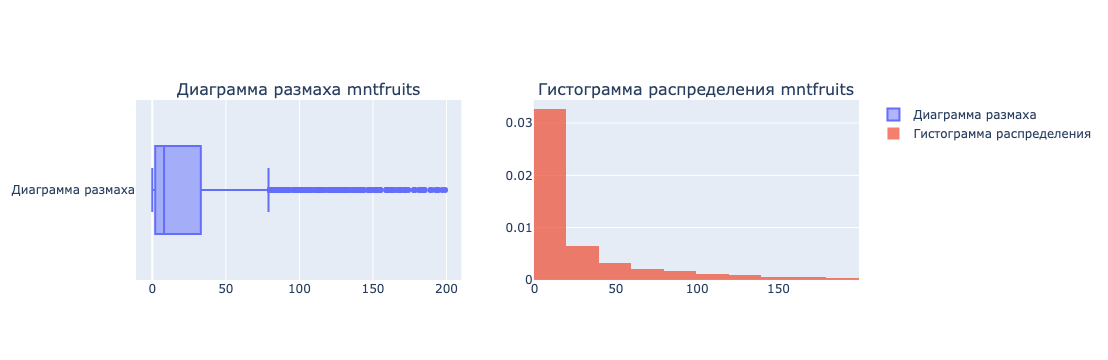

mntfruits
Среднее: 26.376
Медиана: 8.000
Ст. откл-е: 39.783
Min: 0.000
Max: 199.000


In [47]:
describe_feature('mntfruits', discrete=False, bins=10)

`mntfruits` - численный непрерывный признак, содержащий информацию о сумме потраченной на фрукты за последние два года. Распределение скошено вправо, основная часть данных находится в диапозоне 0-19 долл. Есть большое количество выбросов (>80 долл.) Среднее также значительно выше медианы за счет выбросов. Медианные траты на фрукты - 8 долл. Максимальные траты на фрукты на одного клиента - 199 долл. Также на диаграмме размаха и гистограмме видно, что есть небольшое число клиентов, которые тратят на фрукты больше чем средний покупатель.

### 3.1.14. Признак `mntmeatproducts`

Выведем описательную статистику признака `mntmeatproducts`:

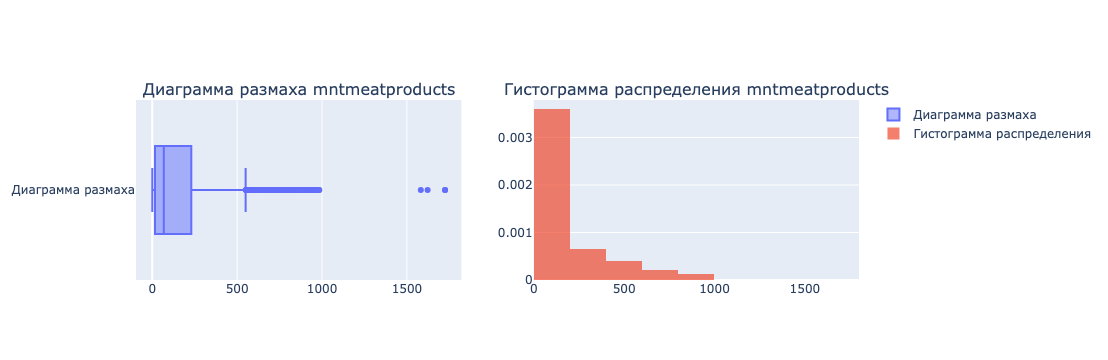

mntmeatproducts
Среднее: 167.780
Медиана: 68.000
Ст. откл-е: 226.338
Min: 0.000
Max: 1725.000


In [48]:
describe_feature('mntmeatproducts', discrete=False, bins=10)

`mntmeatproducts` - численный непрерывный признак, содержащий информацию о сумме потраченной на мясные продукты за последние два года. Характер распределения похож на предыдущие. Основная часть данных находится в диапозоне 0-199 долл. Есть длинный "хвост", который говорит о том, что есть небольшое количество клиентов с тратами на мясные продукты значительно превышающими средний уровень. Медианный уровень также значительно ниже среднего, за счет наличия выбросов (>550 долл.) Максимальные траты на мясные продукты на одного клиента - 1725 долл.

### 3.1.15. Признак `mntfishproducts`

Выведем описательную статистику признака `mntfishproducts`:

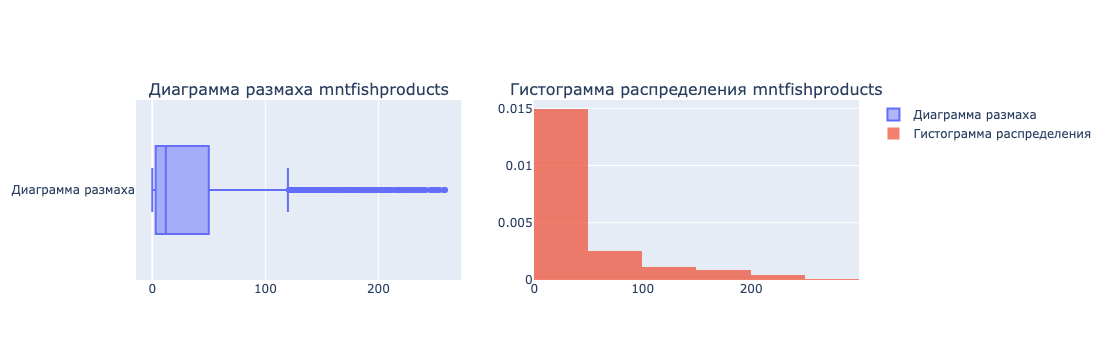

mntfishproducts
Среднее: 37.577
Медиана: 12.000
Ст. откл-е: 54.854
Min: 0.000
Max: 259.000


In [49]:
describe_feature('mntfishproducts', discrete=False, bins=10)

`mntfishproducts` - численный непрерывный признак, содержащий информацию о сумме потраченной на рыбные продукты за последние два года. Вид распределения аналогичен предыдущим. Основная часть данных находится в диаозоне 0-49 долл. Есть небольшое количество клиентов с тратами на рыбу значительно превышающими средний уровень. Медианные траты на рыбу - 12 долл, средние - 38. Есть большое количество выбросов (>120 долл.) Максимальные траты на рыба на одного клиента - 259 долл.

### 3.1.16. Признак `mntsweetproducts`

Выведем описательную статистику признака `mntsweetproducts`:

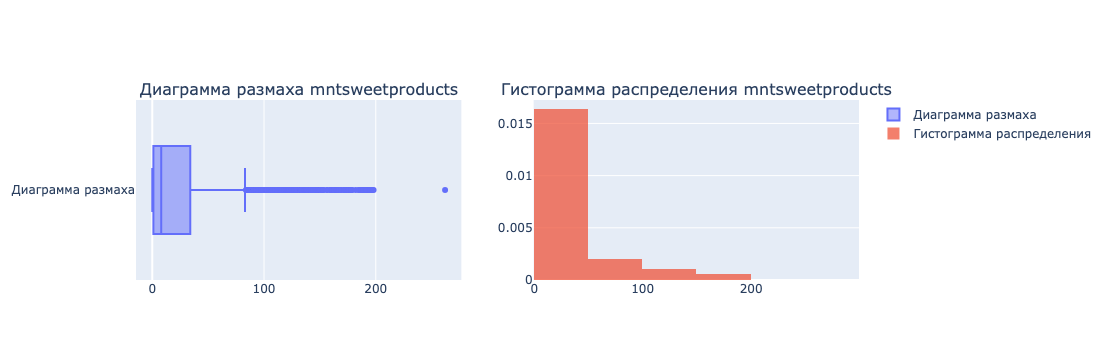

mntsweetproducts
Среднее: 27.187
Медиана: 8.000
Ст. откл-е: 41.495
Min: 0.000
Max: 262.000


In [50]:
describe_feature('mntsweetproducts', discrete=False, bins=10)

`mntsweetproducts` - численный непрерывный признак, содержащий информацию о сумме потраченной на сладости за последние два года. Основная часть данных находится в диапозоне 0-49 долл. Медианные траты - 8, средние - 27 долл. Есть большое количество выбросов (>83 долл.). По данному параметру также можно сказать, что есть небольшое количество клиентов с тратами на сладости значительно превышающие средний уровень. Максимальные расходы на сладости для одного клиента - 262 долл.

### 3.1.17. Признак `mntgoldprods`

Выведем описательную статистику признака `mntgoldprods`:

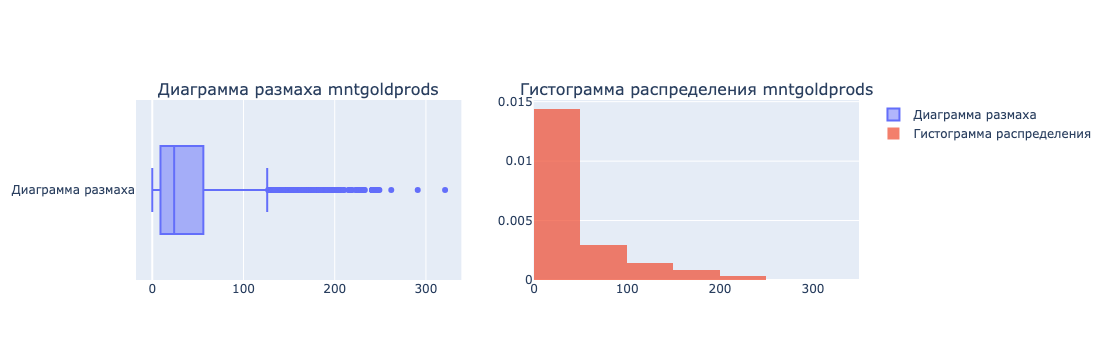

mntgoldprods
Среднее: 43.635
Медиана: 24.000
Ст. откл-е: 51.506
Min: 0.000
Max: 321.000


In [51]:
describe_feature('mntgoldprods', discrete=False, bins=10)

`mntgoldprods` - численный непрерывный признак, содержащий информацию о сумме потраченной на продукты, размещенные на "золотой полке". Большая часть данных находится в диапозоне 0-49 долл. Есть небольшое количество клиентов с тратами на такие продукты значительно превышающие средний уровень. Медианный уровень трат - 24 долл, средний - 44 долл., есть большое количество выбросов (>126 долл.). Максимальная сумма потраченная на продукты золотой полки - 321 долл.

### 3.1.18. Признак `mnt_total`

Выведем описательную статистику признака `mnt_total`:

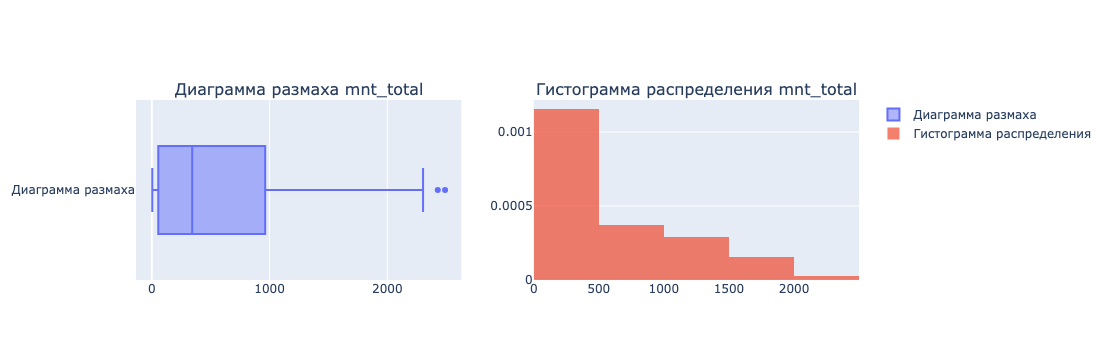

mnt_total
Среднее: 563.583
Медиана: 343.000
Ст. откл-е: 576.859
Min: 4.000
Max: 2491.000


In [52]:
describe_feature('mnt_total', discrete=False, bins=10)

`mnt_total` - численный непрерывный признак, содержащий информацию об общей сумме расходов по основным товарным категориям. Данный признак добавлен на этапе дообогащения данных. Распределение похоже на рассмотренные выше. Основная часть данных находится в диапозоне 0-499 долл., есть небольшое количество клиентов с суммарными тратами превышающими средний уровень. Медианные расходы - 343, средние - 564 долл. Минимальная сумма по клиенту в датасете - 4 долл., максимальная - 2491 долл.

### 3.1.19. Признак `expenses_per_member`

Выведем описательную статистику признака `expenses_per_member`:

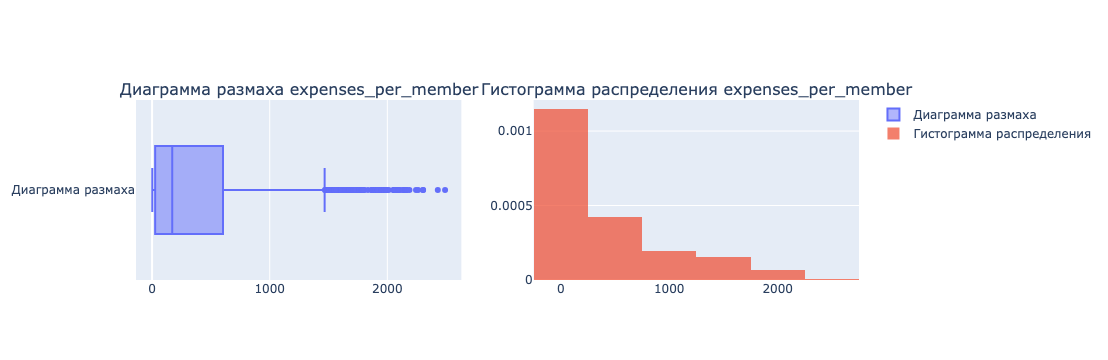

expenses_per_member
Среднее: 421.974
Медиана: 171.250
Ст. откл-е: 544.378
Min: 1.500
Max: 2491.000


In [53]:
describe_feature('expenses_per_member', discrete=False, bins=10)

`expenses_per_member` - численный непрерывный признак, содержащий информацию об общих расходах в расчете на каждого члена семьи. Основная часть данных находится в диапозоне 0-249 долл. Медиана и среднее также сильно отличается за счет наличия клиентов, у которых расходы на одного члена семьи существенно превышают средние по датасету. В целом показатель варьируется от 1.5 до 2491 долл. Есть большое количество выбросов (>1467 долл.)

В целом резюмируя обзор данных с тратами клиентов в различных категориях мы видим что есть группа клиентов, у которых траты в рассмотренных категориях значительно превышают средний уровень. Это может быть полезным признаком при проведении кластеризации клиентов. Скорее всего это могут быть либо состоятельные клиенты либо клиенты имеющие большую семью.

### 3.1.20. Признак `avg_check`

Выведем описательную статистику признака `avg_check`:

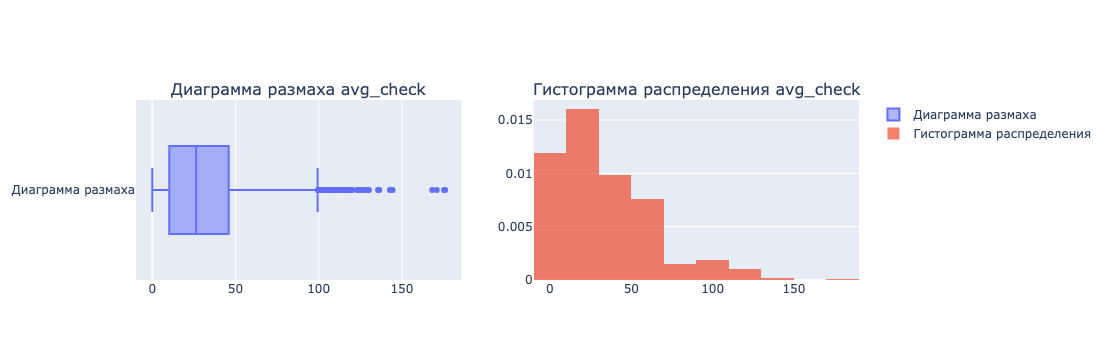

avg_check
Среднее: 34.307
Медиана: 26.374
Ст. откл-е: 29.187
Min: 0.000
Max: 176.000


In [54]:
describe_feature('avg_check', discrete=False, bins=10)

`avg_check` - численный непрерывный признак, содержащий информацию о средней стоимости покупок клиентов исходя из трат по основным категориям и количеству совершенных покупок. Данный признак добавлен на этапе дообогащения данных. На гистограмме видно, что основная часть данных находится в диапозоне 0-70 долл. Здесь также видим, что есть небольшое количество клиентов с более высокими средними чеками. Медианный чек по датасету - 26 долл., средний - 34 долл. Максимальный средний чек в датасете - 176 долл. Есть большое количество выбросов (>99 долл.)

### 3.1.21. Признак `numdealspurchases`

Выведем описательную статистику признака `numdealspurchases`:

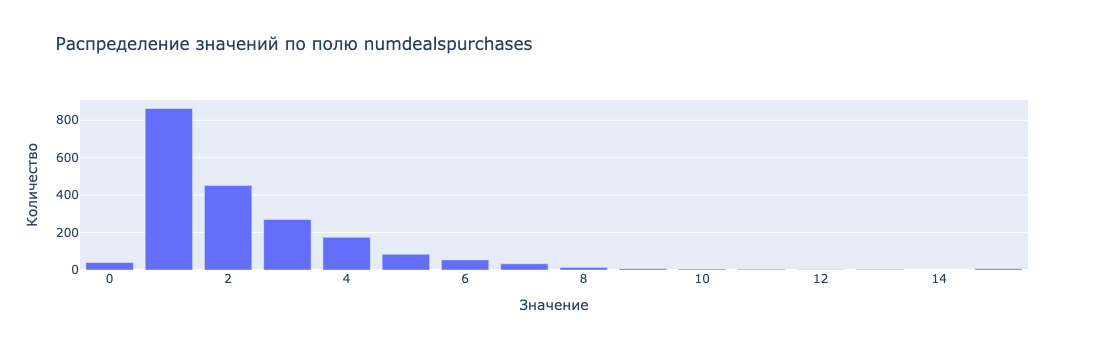

numdealspurchases
Среднее: 2.330
Min: 0.000
Max: 15.000
Уникальные значения:
[ 1  2  3  0  4 12  7  5  6 11  9  8 10 15 13]


In [55]:
describe_feature('numdealspurchases')

`numdealspurchases` - дискретный численный признак с информацией о количестве покупок со скидкой. Среднее количество таких покупок - 2. Чаще всего встречается 1 покупка со скидкой (863), максимальное количество таких покупок в датасете - 15.

### 3.1.22. Признак `numwebpurchases`

Выведем описательную статистику признака `numwebpurchases`:

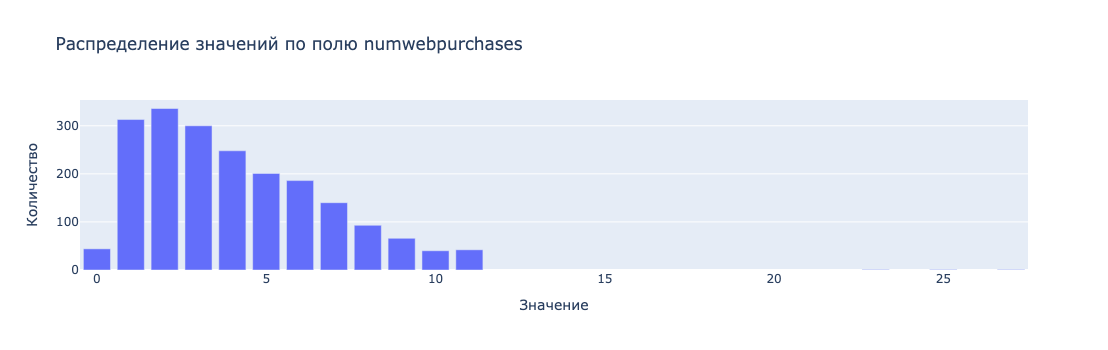

numwebpurchases
Среднее: 4.102
Min: 0.000
Max: 27.000
Уникальные значения:
[ 4  7  3  1 10  2  6  5 25  8  9  0 11 27 23]


In [56]:
describe_feature('numwebpurchases')

`numwebpurchases` - дискретный численный признак с информацией о количестве покупок совершенных на сайте компании. Среднее количество таких покупок - 4, наиболее часто встречаются данные в диапозоне 1-4 покупки на сайте. Максимальное количество покупок совершенных на сайте - 27.

### 3.1.23. Признак `numcatalogpurchases`

Выведем описательную статистику призназа `numcatalogpurchases`:

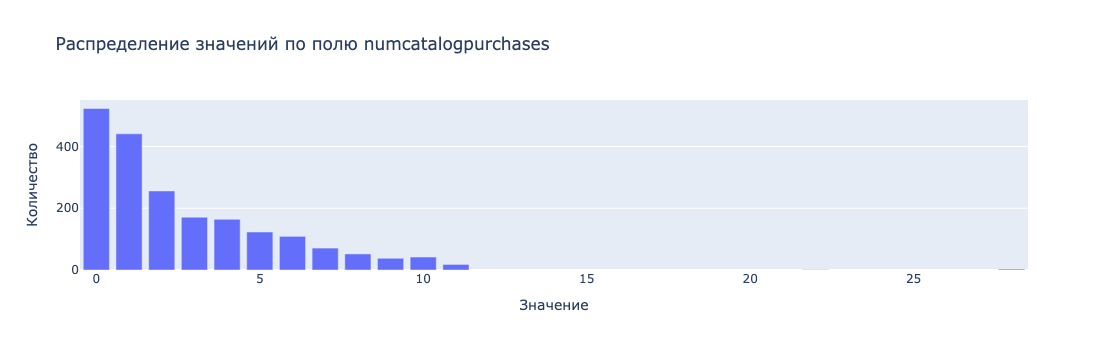

numcatalogpurchases
Среднее: 2.669
Min: 0.000
Max: 28.000
Уникальные значения:
[ 4  3  2  0  1  7 10  6  8  5  9 11 28 22]


In [57]:
describe_feature('numcatalogpurchases')

`numcatalogpurchases` - дискретный численный признак с информацией о количестве покупок, совершенных с помощью каталога (покупка товаров, которые должны быть отправлены по почте). Среднее количество таких покупок - 3, чаще всего встречаются случаи с 0-1 покупкой по каталогу. Есть небольшое количество пользователей, которые совершают покупки по каталогу значительно чаще среднего уровня. Максимальное количество покупок по каталогу на клиента - 28.

### 3.1.24. Признак `numstorepurchases`

Выведем описательную статистику признака `numstorepurchases`:

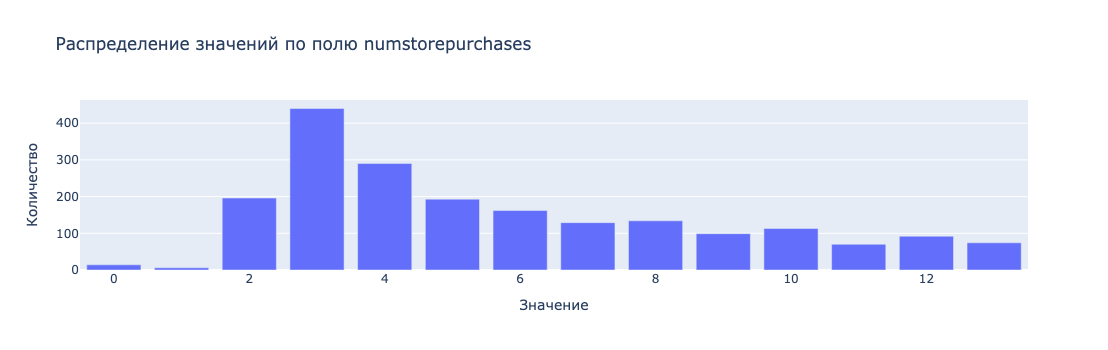

numstorepurchases
Среднее: 5.789
Min: 0.000
Max: 13.000
Уникальные значения:
[ 6  7  5  2  3  9 10  0  8  4 13 12  1 11]


In [58]:
describe_feature('numstorepurchases')

`numstorepurchases` - дискретный численный признак с информацией о количестве покупок совершенных непосредственно в магазине. Среднее количество таких покупок - около 6. Наиболее часто встречаются клиенты с 3-4 покупками в магазине. Максимальное количество покупок в магазине - 13.

### 3.1.25. Признак `total_purchases`

Выведем описательную статистику призназа `total_purchases`:

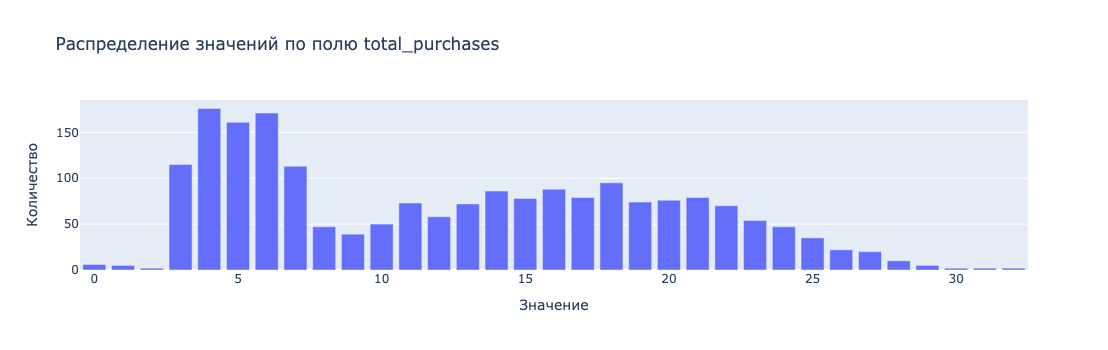

total_purchases
Среднее: 12.560
Min: 0.000
Max: 32.000
Уникальные значения:
[14 17 10  3  6 16 27 21 15  4 25  8  5 12 22  7 19 11 18 32 13 23  2 20
 28 26 24  9 29  1 31  0 30]


In [59]:
describe_feature('total_purchases')

`total_purchases` - дискретный численный признак с информацией об общем количестве совершенных покупок. Признак добавлен на этапе дообогащения данных. На гистограмме мы видим два пика в диапозоне 3-7 покупок на клиента и 14-22 покупок на клиента. Среднее общее количество совершенных покупок на клиента - 13. Максимальное количество покупок на одного клиента - 32.

В целом резюмируя информацию по блоку признаков с количеством различных покупок можно сделать вывод о том, что покупка товаров непосредственно в магазине - наиболее популярный способ совершения покупок (около 6 покупок на клиента). Второй по популярности канал - покупки на сайте компании (около 4 покупок на клиента).

### 3.1.26. Признак `numwebvisitsmonth`

Выведем описательную статистику признака `numwebvisitsmonth`:

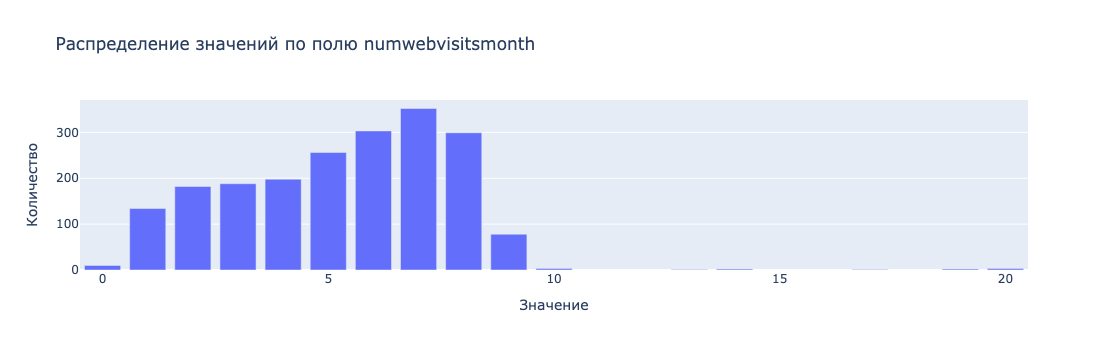

numwebvisitsmonth
Среднее: 5.316
Min: 0.000
Max: 20.000
Уникальные значения:
[ 1  5  2  7  6  4  8  3  9  0 17 13 10 14 19 20]


In [60]:
describe_feature('numwebvisitsmonth')

`numwebvisitsmonth` - дискретный численный признак с информацией о количестве посещений сайта компании за последний месяц. Большая часть данных по данному признаку находится в диапозоне 1-8 посещений за последний месяц. Среднее количество посещений сайта по клиентам - 5. Максимальное количество посещений клиентом сайта - 20.

### 3.1.27. Признак `registration_age`

Выведем описательную статистику признака `registration_age`:

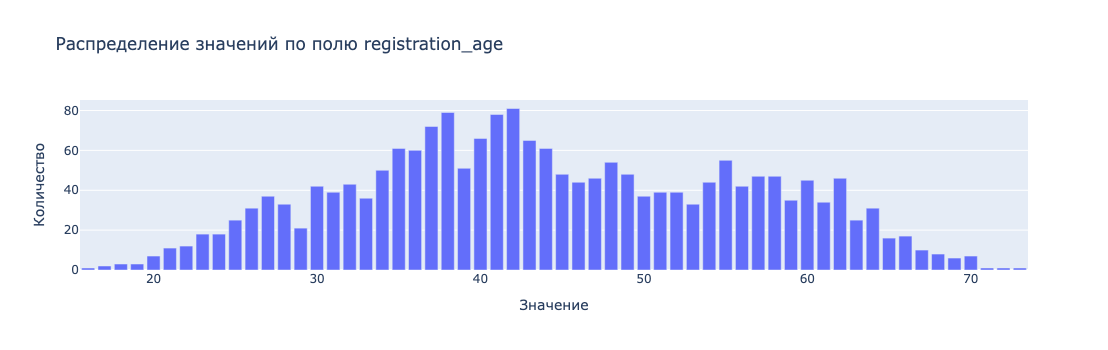

registration_age
Среднее: 44.144
Min: 16.000
Max: 73.000
Уникальные значения:
[44 53 56 47 25 60 66 34 54 32 36 55 59 37 43 58 39 28 42 40 23 26 29 52
 45 41 30 27 62 50 31 57 38 51 35 49 48 65 68 64 33 63 22 61 67 46 24 69
 21 20 70 16 18 19 17 71 72 73]


In [61]:
describe_feature('registration_age')

`registration_age` - дискретный численный признак с информацией о возрасте клиента на момент регистрации в программе лояльности компании. Чаще всего регистрировались клиенты в возрасте 34-50 лет и 54-62 года. Средний возраст клиента на момент регистрации - 44 года. Самому младшему клиенту на момент регистрации было 16 лет, самому старшему 73 года.

### 3.1.28. Вывод по разделу описательной статистики данных

* Большая часть клиентов имеют уровень образования Graduation (1014 клиентов) - выпускники средней школы или колледжа / бакалавры. Вторая по популярности категория - PhD (436 клиентов). Меньше всего клиентов с базовым уровнем образования (49).

* В разрезе семейного статуса больше всего клиентов находящихся в браке (781 человек), состоящих в отношениях (509 человек), и не состоящих в отношениях (435 человек). Самые малочисленные категории: Alone, Absurd и YOLO.

* Доходы клиентов варьируются от 1730 до 667 тыс. долларов в год. Медианный доход - 51.5 тыс долл./год, средний доход выше медианного за счет наличия нескольких экстремальных значений. Годовой доход 75% клиентов не превышает 68.6 тыс. долл.

* Больше всего клиентов, имеющих одного ребенка (1023), на втором месте клиенты без детей - 568, три ребенка - самое редкое явление - всего 45 клиентов.

* `complain` -  признак, указывающий на факт жалоб со стороны клиента. Клиентов, которые направляли жалобы всего 19 человек (менее 1%). Такой признак не несет информации, так как по сути является в 99% нулевым столбцом.

* Есть группа клиентов, у которых траты в рассмотренных категориях значительно превышают средний уровень. Это может быть полезным признаком при проведении кластеризации клиентов. Скорее всего это могут быть либо состоятельные клиенты либо клиенты имеющие большую семью.

* Покупка товаров непосредственно в магазине - наиболее популярный способ совершения покупок (около 6 покупок на клиента). Второй по популярности канал - покупки на сайте компании (около 4 покупок на клиента).

* В среднем клиенты посещают веб-сайт компании около 5 раз в месяц.

* Чаще всего регистрировались клиенты в возрасте 34-50 лет и 54-62 года. Средний возраст клиента на момент регистрации - 44 года. Самому младшему клиенту на момент регистрации было 16 лет, самому старшему 73 года.

### 3.2. Средние значения признаков по группам принявших и не принявших предложение о покупке клиентов

Создадим датасет, содержащий только количественные столбцы и посчитаем среднии показатели для двух классов целевой переменной `response`:

In [62]:
df_numeric = df.select_dtypes(include=['number'])

Создадим сводную таблицу и посчитаем средние показатели:

In [63]:
numeric_pivot = df_numeric.pivot_table(index='response',
                       aggfunc='mean')
numeric_pivot

,avg_check,children_total,complain,expenses_per_member,income,is_parent,kidhome,mnt_total,mntfishproducts,mntfruits,mntgoldprods,mntmeatproducts,mntsweetproducts,mntwines,numcatalogpurchases,numdealspurchases,numstorepurchases,numwebpurchases,numwebvisitsmonth,recency,registration_age,teenhome,total_purchases,year_birth
response,,,,,,,,,,,,,,,,,,,,,,,,
0,31.187660,1.005848,0.009357,355.027973,50969.454971,0.758480,0.461404,500.639181,35.185965,24.205263,40.169591,145.115789,25.174269,270.957895,2.399415,2.334503,5.747953,3.925146,5.315205,51.428655,44.305848,0.544444,12.072515,1968.777193
1,51.968061,0.629139,0.009934,801.037528,60170.003311,0.486755,0.334437,919.983444,51.112583,38.665563,63.258278,296.109272,38.582781,495.513245,4.195364,2.301325,6.019868,5.102649,5.321192,35.145695,43.225166,0.294702,15.317881,1969.529801


Визуализируем полученные данные. Для начала получим список колонок:

In [64]:
columns_list = numeric_pivot.columns.to_list()

Построим графики:

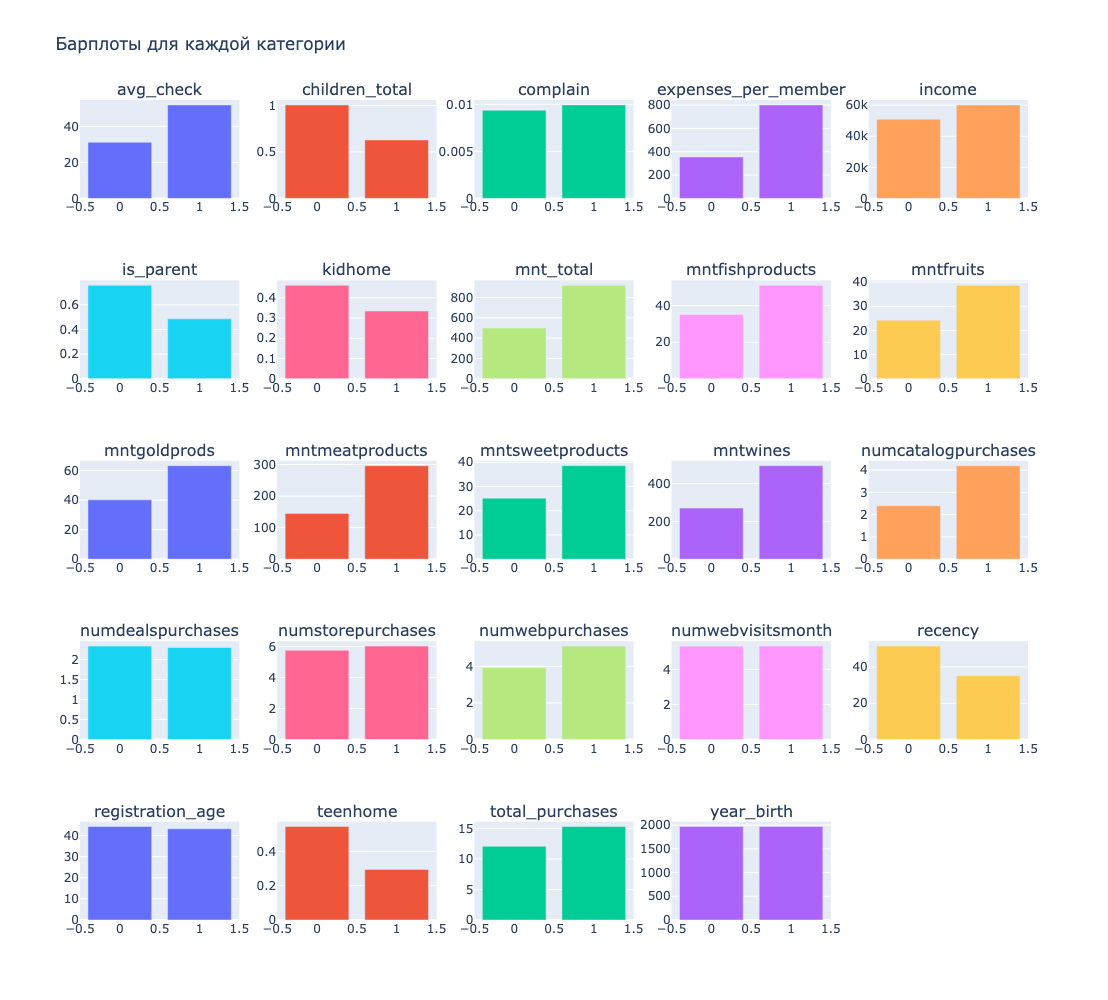

In [65]:
# Создание подграфиков (5x5)
fig = make_subplots(rows=5, cols=5, subplot_titles=columns_list)

# Добавление барплотов в подграфики
for i, column in enumerate(columns_list):
    row = i // 5 + 1  # Определение строки
    col = i % 5 + 1   # Определение столбца
    fig.add_trace(go.Bar(x=numeric_pivot.index, y=numeric_pivot[column], name=column), row=row, col=col)

# Обновление макета
fig.update_layout(title_text='Барплоты для каждой категории', height=1000, showlegend=False)

# Отображение графика
fig.show()

Для краткости обозначим клиентов, совершающих целевое действие (принимающих предложение и совершающих покупку) обозначим "группа 1", клиентов, которые не совершают целевых действий обозначим "группа 0".

**Существенные различия по группам видны у следующих показателей:**
* Группа показателей состава семьи:
    * Клиенты являющиеся родителями, имеющие большее количество маленьких детей и подростков чаще попадают в группу 0

* Группа показателей расходов на основные товарные категории:
    * Клиенты из группы 1 в среднем тратят боольше денег на основные товарные категории.
    * Средние расходы в расчете на каждого члена семьи также выше у клиентов из группы 1 (801 против 355 долл.)

* Группа показателей каналов продаж:
    * клиенты из группы 1 чаще заказывают товары по каталогу (4 против 2)
    * клиенты из группы 1 чаще покупают на сайте (5 против 4)
    * клиенты из группы 1 в целом чаще совершают покупки (15 против 12)

* У клиентов из группы 1 средний чек выше (52 долл. против 31)
* Клиенты из группы 1 чаще совершают покупки - 1 раз в 35 дней, у клиентов из группы 0  - 1 р в 51 день.
* Клиенты из группы 1 зарабатывают в среднем на 10 тыс.долл в год больше.

**Видимые отличия отсутсвуют или незначительны по следующим признакам**:
* жалобы
* покупки со скидкой
* покупки непосредственно в магазине
* количество посещений сайта за последний месяц
* возраст клиента на момент регистрации
* год рождения

### 3.3. Матрица корреляций признаков

Построим матрицу корреляций между численными признаками в датасете:

In [66]:
cor_matrix = df_numeric.corr()
cor_matrix

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain,registration_age,children_total,is_parent,mnt_total,expenses_per_member,total_purchases,avg_check
year_birth,1.000000,-0.164323,0.250259,-0.363224,-0.015232,-0.171036,-0.026117,-0.041779,-0.043875,-0.029028,-0.053713,-0.053596,-0.159801,-0.126610,-0.145255,0.126056,0.023038,0.001800,-0.998285,-0.086268,0.021445,-0.124253,-0.074433,-0.178581,-0.111160
income,-0.164323,1.000000,-0.426922,0.021052,-0.006635,0.563384,0.420286,0.571552,0.428606,0.428778,0.311236,-0.082379,0.374392,0.576514,0.515372,-0.541848,0.128461,-0.024148,0.164802,-0.291508,-0.339521,0.653573,0.598054,0.611751,0.610576
kidhome,0.250259,-0.426922,1.000000,-0.051218,0.019240,-0.504155,-0.372429,-0.438603,-0.388219,-0.374697,-0.351576,0.208383,-0.376889,-0.502084,-0.504540,0.441262,-0.084585,0.034463,-0.246038,0.681416,0.517470,-0.555818,-0.531934,-0.577375,-0.520147
teenhome,-0.363224,0.021052,-0.051218,1.000000,0.023399,0.004871,-0.174748,-0.256834,-0.194796,-0.158866,-0.014604,0.373632,0.154949,-0.110849,0.048192,0.120786,-0.163222,0.003458,0.361761,0.696035,0.581801,-0.139932,-0.348870,0.035841,-0.140372
recency,-0.015232,-0.006635,0.019240,0.023399,1.000000,0.014546,-0.013312,0.014974,-0.002476,0.023695,0.012194,0.011847,-0.006864,0.014622,0.000645,-0.013019,-0.200926,-0.001368,0.013739,0.030981,0.015459,0.014914,0.001841,0.003638,0.015080
mntwines,-0.171036,0.563384,-0.504155,0.004871,0.014546,1.000000,0.384523,0.562122,0.394808,0.383752,0.391901,0.007096,0.550626,0.627245,0.636336,-0.313493,0.238340,-0.034949,0.161297,-0.358893,-0.351742,0.895719,0.772611,0.754653,0.830180
mntfruits,-0.026117,0.420286,-0.372429,-0.174748,-0.013312,0.384523,1.000000,0.542843,0.590371,0.557600,0.401321,-0.134089,0.298009,0.485046,0.454988,-0.407224,0.129854,-0.000018,0.021970,-0.395824,-0.414694,0.602573,0.593256,0.517800,0.557022
mntmeatproducts,-0.041779,0.571552,-0.438603,-0.256834,0.014974,0.562122,0.542843,1.000000,0.564912,0.522451,0.352194,-0.112644,0.300449,0.734171,0.476443,-0.527985,0.238332,-0.019254,0.036731,-0.503557,-0.575879,0.849096,0.867918,0.630340,0.787292
mntfishproducts,-0.043875,0.428606,-0.388219,-0.194796,-0.002476,0.394808,0.590371,0.564912,1.000000,0.581207,0.427077,-0.137771,0.296785,0.526460,0.461827,-0.436267,0.103729,-0.016863,0.039204,-0.421868,-0.445511,0.629633,0.616912,0.537357,0.579745
mntsweetproducts,-0.029028,0.428778,-0.374697,-0.158866,0.023695,0.383752,0.557600,0.522451,0.581207,1.000000,0.363119,-0.116745,0.331176,0.488038,0.451002,-0.408730,0.115443,-0.018897,0.023660,-0.385815,-0.400684,0.594563,0.574358,0.529965,0.535991


Визуализируем матрицу корреляций с помощью тепловой карты:

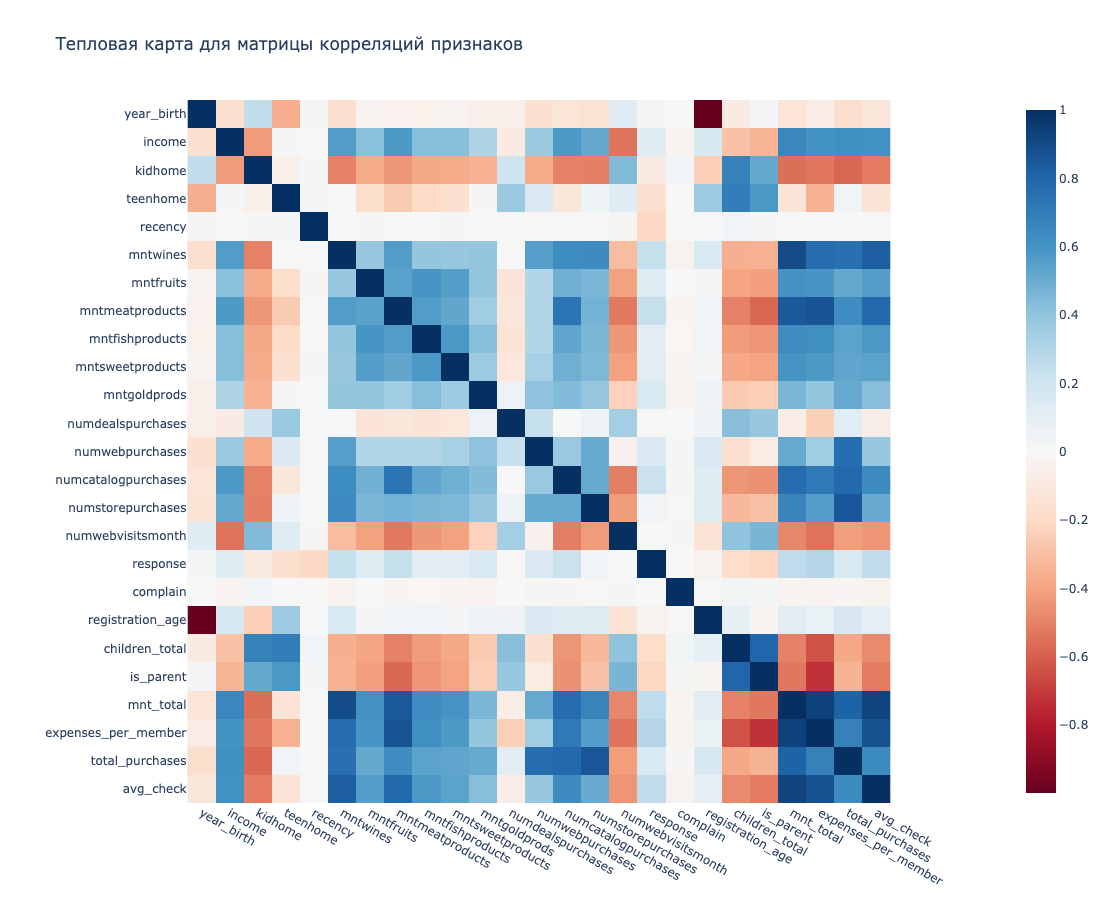

In [67]:
# Построение тепловой карты
fig = px.imshow(cor_matrix, 
                 color_continuous_scale='RdBu',  # Цветовая шкала
                 title='Тепловая карта для матрицы корреляций признаков')

fig.update_layout(width=900, height=900)

# Отображение графика
fig.show()

Признаков много, поэтому даже тепловая карта получается плохо читаемой. Отберем корреляции свыше 0.4 (умеренная и сильная положительная корреляция) по каждому признаку из матрицы корреляций и выведем на экран с помощью цикла:

In [68]:
for column in cor_matrix.columns.to_list():
    print()
    print(f'Наиболее сильные положительные корреляции {column}:')
    cr_matrix = cor_matrix[[column]]
    cr_matrix = cr_matrix[cr_matrix[column]>=0.4]
    display(cr_matrix.sort_values(by=column, ascending=False))


Наиболее сильные положительные корреляции year_birth:


,year_birth
year_birth,1.0



Наиболее сильные положительные корреляции income:


,income
income,1.000000
mnt_total,0.653573
total_purchases,0.611751
avg_check,0.610576
expenses_per_member,0.598054
numcatalogpurchases,0.576514
mntmeatproducts,0.571552
mntwines,0.563384
numstorepurchases,0.515372
mntsweetproducts,0.428778



Наиболее сильные положительные корреляции kidhome:


,kidhome
kidhome,1.000000
children_total,0.681416
is_parent,0.517470
numwebvisitsmonth,0.441262



Наиболее сильные положительные корреляции teenhome:


,teenhome
teenhome,1.000000
children_total,0.696035
is_parent,0.581801



Наиболее сильные положительные корреляции recency:


,recency
recency,1.0



Наиболее сильные положительные корреляции mntwines:


,mntwines
mntwines,1.000000
mnt_total,0.895719
avg_check,0.830180
expenses_per_member,0.772611
total_purchases,0.754653
numstorepurchases,0.636336
numcatalogpurchases,0.627245
income,0.563384
mntmeatproducts,0.562122
numwebpurchases,0.550626



Наиболее сильные положительные корреляции mntfruits:


,mntfruits
mntfruits,1.000000
mnt_total,0.602573
expenses_per_member,0.593256
mntfishproducts,0.590371
mntsweetproducts,0.557600
avg_check,0.557022
mntmeatproducts,0.542843
total_purchases,0.517800
numcatalogpurchases,0.485046
numstorepurchases,0.454988



Наиболее сильные положительные корреляции mntmeatproducts:


,mntmeatproducts
mntmeatproducts,1.000000
expenses_per_member,0.867918
mnt_total,0.849096
avg_check,0.787292
numcatalogpurchases,0.734171
total_purchases,0.630340
income,0.571552
mntfishproducts,0.564912
mntwines,0.562122
mntfruits,0.542843



Наиболее сильные положительные корреляции mntfishproducts:


,mntfishproducts
mntfishproducts,1.000000
mnt_total,0.629633
expenses_per_member,0.616912
mntfruits,0.590371
mntsweetproducts,0.581207
avg_check,0.579745
mntmeatproducts,0.564912
total_purchases,0.537357
numcatalogpurchases,0.526460
numstorepurchases,0.461827



Наиболее сильные положительные корреляции mntsweetproducts:


,mntsweetproducts
mntsweetproducts,1.000000
mnt_total,0.594563
mntfishproducts,0.581207
expenses_per_member,0.574358
mntfruits,0.557600
avg_check,0.535991
total_purchases,0.529965
mntmeatproducts,0.522451
numcatalogpurchases,0.488038
numstorepurchases,0.451002



Наиболее сильные положительные корреляции mntgoldprods:


,mntgoldprods
mntgoldprods,1.000000
total_purchases,0.509582
mnt_total,0.461269
numcatalogpurchases,0.437838
mntfishproducts,0.427077
avg_check,0.426616
numwebpurchases,0.408042
mntfruits,0.401321



Наиболее сильные положительные корреляции numdealspurchases:


,numdealspurchases
numdealspurchases,1.000000
children_total,0.423636



Наиболее сильные положительные корреляции numwebpurchases:


,numwebpurchases
numwebpurchases,1.000000
total_purchases,0.766339
mntwines,0.550626
mnt_total,0.511770
numstorepurchases,0.506193
mntgoldprods,0.408042



Наиболее сильные положительные корреляции numcatalogpurchases:


,numcatalogpurchases
numcatalogpurchases,1.000000
total_purchases,0.784650
mnt_total,0.772675
mntmeatproducts,0.734171
expenses_per_member,0.717142
avg_check,0.634519
mntwines,0.627245
income,0.576514
mntfishproducts,0.526460
numstorepurchases,0.511992



Наиболее сильные положительные корреляции numstorepurchases:


,numstorepurchases
numstorepurchases,1.000000
total_purchases,0.854196
mnt_total,0.665974
mntwines,0.636336
expenses_per_member,0.555369
income,0.515372
numcatalogpurchases,0.511992
numwebpurchases,0.506193
avg_check,0.503179
mntmeatproducts,0.476443



Наиболее сильные положительные корреляции numwebvisitsmonth:


,numwebvisitsmonth
numwebvisitsmonth,1.000000
is_parent,0.464789
kidhome,0.441262
children_total,0.405765



Наиболее сильные положительные корреляции response:


,response
response,1.0



Наиболее сильные положительные корреляции complain:


,complain
complain,1.0



Наиболее сильные положительные корреляции registration_age:


,registration_age
registration_age,1.0



Наиболее сильные положительные корреляции children_total:


,children_total
children_total,1.000000
is_parent,0.798414
teenhome,0.696035
kidhome,0.681416
numdealspurchases,0.423636
numwebvisitsmonth,0.405765



Наиболее сильные положительные корреляции is_parent:


,is_parent
is_parent,1.000000
children_total,0.798414
teenhome,0.581801
kidhome,0.517470
numwebvisitsmonth,0.464789



Наиболее сильные положительные корреляции mnt_total:


,mnt_total
mnt_total,1.000000
expenses_per_member,0.932246
avg_check,0.925410
mntwines,0.895719
mntmeatproducts,0.849096
total_purchases,0.812590
numcatalogpurchases,0.772675
numstorepurchases,0.665974
income,0.653573
mntfishproducts,0.629633



Наиболее сильные положительные корреляции expenses_per_member:


,expenses_per_member
expenses_per_member,1.000000
mnt_total,0.932246
avg_check,0.874277
mntmeatproducts,0.867918
mntwines,0.772611
numcatalogpurchases,0.717142
total_purchases,0.679230
mntfishproducts,0.616912
income,0.598054
mntfruits,0.593256



Наиболее сильные положительные корреляции total_purchases:


,total_purchases
total_purchases,1.000000
numstorepurchases,0.854196
mnt_total,0.812590
numcatalogpurchases,0.784650
numwebpurchases,0.766339
mntwines,0.754653
expenses_per_member,0.679230
avg_check,0.632839
mntmeatproducts,0.630340
income,0.611751



Наиболее сильные положительные корреляции avg_check:


,avg_check
avg_check,1.000000
mnt_total,0.925410
expenses_per_member,0.874277
mntwines,0.830180
mntmeatproducts,0.787292
numcatalogpurchases,0.634519
total_purchases,0.632839
income,0.610576
mntfishproducts,0.579745
mntfruits,0.557022


* Умеренные и сильные положительные корреляции обнаружены для следующих признаков:
    * доход (`income`):
      * со всеми расходами на основные товарные категории и производными от них признаками (общие расходы, средний чек, расход на члена семьи)
      * со всеми показателями количества покупок по основным каналам и производным от них - общим количеством покупок по всем каналам
    * количество маленьких детей (`kidhome`) c количеством посещений сайта (`numwebvisitsmonth`)
    * количество покупок со скидкой (`numdealspurchases`) с общим количеством детей (`children_total`)
    * количество покупок на сайте (`numwebpurchases`) с:
      * тратами на вино (`mntwines`)
      * общей суммой расходов (`mnt_total`)
      * количеством покупок в магазине (`numstorepurchases`)
      * траты на продукты с золотой полки (`mntgoldprods`)
    * количество покупок по каталогу (`numcatalogpurchases`) с:
      * тратами на все виды товарных категорий
      * расходами на одного члена семьи (`expenses_per_member`)
      * средним чеком (`avg_check`)
    * количество покупок в магазине (`numstorepurchases`) с
      * тратами на все виды товарных категорий
      * расходами на члена семьи (`expenses_per_member`)
 
* Для следующих признаков отсутствуют сколько-нибудь значимые положительные корреляции:
    * год рождения (`year_birth`)
    * дней с последней покупки (`recency`)
    * целевая пременная (`response`)
    * жалобы (`complain`)
    * возраст на момент регистрации (`registration_age`)
    * количество детей-подростков (`teenhome`)


* Резюме:
    * Из рассмотренных значимых положительных корреляций можно сделать следующие обобщающие выводы:
      * Чем выше доходы клиента тем выше траты на все товарные категории и количество совершенных покупок по всем каналам
      * Клиенты с детьми чаще совершают покупки со скидкой
      * Не удалось обнаружить положительной корреляции между целевой переменной и другими признаками в датасете

Отберем корреляции менее -0.4 (умеренная и сильная отрицательная корреляция) по каждому признаку из матрицы корреляций и выведем на экран с помощью цикла:

In [69]:
for column in cor_matrix.columns.to_list():
    print()
    print(f'Наиболее сильные отрицательные корреляции {column}:')
    cr_matrix = cor_matrix[[column]]
    cr_matrix = cr_matrix[cr_matrix[column]<=-0.4]
    display(cr_matrix.sort_values(by=column, ascending=True))


Наиболее сильные отрицательные корреляции year_birth:


,year_birth
registration_age,-0.998285



Наиболее сильные отрицательные корреляции income:


,income
numwebvisitsmonth,-0.541848
kidhome,-0.426922



Наиболее сильные отрицательные корреляции kidhome:


,kidhome
total_purchases,-0.577375
mnt_total,-0.555818
expenses_per_member,-0.531934
avg_check,-0.520147
numstorepurchases,-0.504540
mntwines,-0.504155
numcatalogpurchases,-0.502084
mntmeatproducts,-0.438603
income,-0.426922



Наиболее сильные отрицательные корреляции teenhome:


,teenhome



Наиболее сильные отрицательные корреляции recency:


,recency



Наиболее сильные отрицательные корреляции mntwines:


,mntwines
kidhome,-0.504155



Наиболее сильные отрицательные корреляции mntfruits:


,mntfruits
is_parent,-0.414694
numwebvisitsmonth,-0.407224



Наиболее сильные отрицательные корреляции mntmeatproducts:


,mntmeatproducts
is_parent,-0.575879
numwebvisitsmonth,-0.527985
children_total,-0.503557
kidhome,-0.438603



Наиболее сильные отрицательные корреляции mntfishproducts:


,mntfishproducts
is_parent,-0.445511
numwebvisitsmonth,-0.436267
children_total,-0.421868



Наиболее сильные отрицательные корреляции mntsweetproducts:


,mntsweetproducts
numwebvisitsmonth,-0.408730
is_parent,-0.400684



Наиболее сильные отрицательные корреляции mntgoldprods:


,mntgoldprods



Наиболее сильные отрицательные корреляции numdealspurchases:


,numdealspurchases



Наиболее сильные отрицательные корреляции numwebpurchases:


,numwebpurchases



Наиболее сильные отрицательные корреляции numcatalogpurchases:


,numcatalogpurchases
numwebvisitsmonth,-0.513741
kidhome,-0.502084
is_parent,-0.452538
children_total,-0.442210



Наиболее сильные отрицательные корреляции numstorepurchases:


,numstorepurchases
kidhome,-0.504540
numwebvisitsmonth,-0.426236



Наиболее сильные отрицательные корреляции numwebvisitsmonth:


,numwebvisitsmonth
expenses_per_member,-0.545277
income,-0.541848
mntmeatproducts,-0.527985
numcatalogpurchases,-0.513741
mnt_total,-0.489054
avg_check,-0.445157
mntfishproducts,-0.436267
numstorepurchases,-0.426236
total_purchases,-0.419846
mntsweetproducts,-0.408730



Наиболее сильные отрицательные корреляции response:


,response



Наиболее сильные отрицательные корреляции complain:


,complain



Наиболее сильные отрицательные корреляции registration_age:


,registration_age
year_birth,-0.998285



Наиболее сильные отрицательные корреляции children_total:


,children_total
expenses_per_member,-0.638106
mntmeatproducts,-0.503557
mnt_total,-0.502156
avg_check,-0.476833
numcatalogpurchases,-0.442210
mntfishproducts,-0.421868



Наиболее сильные отрицательные корреляции is_parent:


,is_parent
expenses_per_member,-0.725848
mntmeatproducts,-0.575879
mnt_total,-0.530980
avg_check,-0.521754
numcatalogpurchases,-0.452538
mntfishproducts,-0.445511
mntfruits,-0.414694
mntsweetproducts,-0.400684



Наиболее сильные отрицательные корреляции mnt_total:


,mnt_total
kidhome,-0.555818
is_parent,-0.530980
children_total,-0.502156
numwebvisitsmonth,-0.489054



Наиболее сильные отрицательные корреляции expenses_per_member:


,expenses_per_member
is_parent,-0.725848
children_total,-0.638106
numwebvisitsmonth,-0.545277
kidhome,-0.531934



Наиболее сильные отрицательные корреляции total_purchases:


,total_purchases
kidhome,-0.577375
numwebvisitsmonth,-0.419846



Наиболее сильные отрицательные корреляции avg_check:


,avg_check
is_parent,-0.521754
kidhome,-0.520147
children_total,-0.476833
numwebvisitsmonth,-0.445157


* Умеренные и сильные отрицательные корреляции обнаружены для следующих признаков:
    * доход (`income`) c 
      * количеством посещений сайта (`numwebvisitsmonth`)
      * количеством маленьких детей (`kidhome`)
    * количество маленьких детей (`kidhome`) с
      * общим количеством покупок (`total_purchases)
      * общими расходами `mnt_total`	
      * расходами на члена семьи `expenses_per_member`	
      * средним чеком `avg_check`	
      * количеством покупок в магазине numstorepurchases	
      * тратами на вино (`mntwines`) и мясные продукты (`mntmeatproducts`)
      * покупками по каталогу `numcatalogpurchases`	
    * признак наличия детей (`is_parent`) с 
      * расходами на члена семьи `expenses_per_member`	
      * расходами на рыбу, фрукты, сладости, маясо
      * средним чеком (`avg_check`)	
      * количеством покупок по каталогу (`numcatalogpurchases`)	

* Для следующих признаков отсутствуют сколько-нибудь значимые отрицательные корреляции корреляции:
    * год рождения (`year_birth`)
    * количество детей-подростков (`teenhome`)
    * дней с последней покупки (`recency`)
    * траты на продукты с золотой полки (`mntgoldprods`)
    * количество покупок со скидкой (`numdealspurchases`)
    * количество покупок на сайте (`numwebpurchases`)
    * целевая пременная (`response`)
    * жалобы (`complain`)
    * возраст на момент регистрации (`registration_age`)

Резюме: Из рассмотрения значимых отрицательных корреляций можно сделать основной обобщающий вывод - факт родительства и особенно наличие маленьких детей находится в отрицательной связи с доходами, тратами на основные товарные категории и прочими производными от них показателями. Также не удалось обнаружить значимой отрицательной корреляции целевой переменной с другими признаками датасета.

#### 3.3.1. Выводы по исследованию корреляции признаков датасета

* Из рассмотренных значимых положительных корреляций можно сделать следующие обобщающие выводы:
   * Чем выше доходы клиента тем выше траты на все товарные категории и количество совершенных покупок по всем каналам
   * Клиенты с детьми чаще совершают покупки со скидкой
   * Не удалось обнаружить положительной корреляции между целевой переменной и другими признаками в датасете


* Из рассмотрения значимых отрицательных корреляций можно сделать основной обобщающий вывод:
    * признак родительства и особенно наличие маленьких детей находится в отрицательной связи с доходами, тратами на основные товарные категории и прочими производными от них показателями.
    * Не удалось обнаружить значимой отрицательной корреляции целевой переменной с другими признаками датасета.

* Таким образом ни один признак в датасете не имеет значимой корреляции с целевой переменной `response`

### 3.4. Выводы по исследовательскому анализу данных

**Описательная статистика данных**
* Большая часть клиентов имеют уровень образования Graduation (1014 клиентов) - выпускники средней школы или колледжа / бакалавры. Вторая по популярности категория - PhD (436 клиентов). Меньше всего клиентов с базовым уровнем образования (49).

* В разрезе семейного статуса больше всего клиентов находящихся в браке (781 человек), состоящих в отношениях (509 человек), и не состоящих в отношениях (435 человек). Самые малочисленные категории: Alone, Absurd и YOLO.

* Доходы клиентов варьируются от 1730 до 667 тыс. долларов в год. Медианный доход - 51.5 тыс долл./год, средний доход выше медианного за счет наличия нескольких экстремальных значений. Годовой доход 75% клиентов не превышает 68.6 тыс. долл.

* Больше всего клиентов, имеющих одного ребенка (1023), на втором месте клиенты без детей - 568, три ребенка - самое редкое явление - всего 45 клиентов.

* `complain` -  признак, указывающий на факт жалоб со стороны клиента. Клиентов, которые направляли жалобы всего 19 человек (менее 1%). Такой признак не несет информации, так как по сути является в 99% нулевым столбцом.

* Есть группа клиентов, у которых траты в рассмотренных категориях значительно превышают средний уровень. Это может быть полезным признаком при проведении кластеризации клиентов. Скорее всего это могут быть либо состоятельные клиенты либо клиенты имеющие большую семью.

* Покупка товаров непосредственно в магазине - наиболее популярный способ совершения покупок (около 6 покупок на клиента). Второй по популярности канал - покупки на сайте компании (около 4 покупок на клиента).

* В среднем клиенты посещают веб-сайт компании около 5 раз в месяц.

* Чаще всего регистрировались клиенты в возрасте 34-50 лет и 54-62 года. Средний возраст клиента на момент регистрации - 44 года. Самому младшему клиенту на момент регистрации было 16 лет, самому старшему 73 года.


**Средние значения признаков по группам принявших и не принявших предложение о покупке клиентов**
Для краткости обозначим клиентов, совершающих целевое действие (принимающих предложение и совершающих покупку) обозначим "группа 1", клиентов, которые не совершают целевых действий обозначим "группа 0".

**Существенные различия по группам видны у следующих показателей:**
* Группа показателей состава семьи:
    * Клиенты являющиеся родителями, имеющие большее количество маленьких детей и подростков чаще попадают в группу 0

* Группа показателей расходов на основные товарные категории:
    * Клиенты из группы 1 в среднем тратят боольше денег на основные товарные категории.
    * Средние расходы в расчете на каждого члена семьи также выше у клиентов из группы 1 (801 против 355 долл.)

* Группа показателей каналов продаж:
    * клиенты из группы 1 чаще заказывают товары по каталогу (4 против 2)
    * клиенты из группы 1 чаще покупают на сайте (5 против 4)
    * клиенты из группы 1 в целом чаще совершают покупки (15 против 12)

* У клиентов из группы 1 средний чек выше (52 долл. против 31)
* Клиенты из группы 1 чаще совершают покупки - 1 раз в 35 дней, у клиентов из группы 0  - 1 р в 51 день.
* Клиенты из группы 1 зарабатывают в среднем на 10 тыс.долл в год больше.

**Видимые отличия отсутсвуют или незначительны по следующим признакам**:
* жалобы
* покупки со скидкой
* покупки непосредственно в магазине
* количество посещений сайта за последний месяц
* возраст клиента на момент регистрации
* год рождения

**Корреляция признаков датасета**

* Чем выше доходы клиента тем выше траты на все товарные категории и количество совершенных покупок по всем каналам
* Клиенты с детьми чаще совершают покупки со скидкой
* Не удалось обнаружить положительной корреляции между целевой переменной и другими признаками в датасете
* Признак родительства и особенно наличие маленьких детей находится в отрицательной связи с доходами, тратами на основные товарные категории и прочими производными от них показателями.
* Не удалось обнаружить значимой отрицательной корреляции целевой переменной с другими признаками датасета.
* Ни один признак в датасете не имеет значимой корреляции с целевой переменной `response`.

## 4. Выбор и обучение модели для определения вероятности покупки товара

### 4.1. Постановка задачи

**Задача**: научиться прогнозировать вероятность совершения покупки для каждого клиента на основе данных о нем и его покупательской истории

**Данные**: датасет с анкетными данными клиентов и историей покупок в различных товарных категориях и по различным источникам

**Встраивание модели в бизнес-процесс**:
* Таргетированное взаимодействия с клиентами на основе аналитических данных. 
* Оптимизация маркетинговых затрат за счет фокусировки на клиентах с высоким уровнем вероятной конверсии

**Ожидаемые результаты:**
* Модель предсказывающая вероятность совершения покупки клиентов
* Наличие такой модели позволит таргетированно работать с клиентами, предлагать специальные акции, скидки и пр. промо активности.

### 4.2. Выбор базового алгоритма для обучения модели

Исходя из задачи исследования требуется выполнить бинарную классификацию клиентов на основе имеющихся признаков - предсказать класс 0 - клиент не совершит покупку, либо 1 - клиент совершит покупку, а также получить показатель вероятности совершения покупки.

Для бинарной классификации подходят следующие алгоритмы:
* **Логистическая регрессия**
    * Линейный алгоритм, используемый для бинарной классификации, который предсказывает вероятность принадлежности объекта к тому или иному классу. Она использует логистическую (сигмоидальную) функцию для преобразования линейной комбинации признаков в значение от 0 до 1, что удобно для интерпретации как вероятностей.
    * Применение: Широко используется для задач, где результаты могут быть классифицированы на два класса

* **KNN (K-Nearest Neighbors)**
    * Основывается на принципе, что объекты, находящиеся близко друг к другу в пространстве признаков, имеют схожие характеристики.
    * Применение: классификация текстов, рекомендательные системы: помогает в создании рекомендаций на основе схожести пользователей или товаров, медицинская диагностика: используется для классификации заболеваний на основе симптомов и медицинских данных, а также применяется для кластеризации и сегментации данных.


* **Метод опорных векторов (SVM) с вероятностной интерпретацией**
    * Основная идея SVM заключается в нахождении гиперплоскости, которая максимально разделяет классы в пространстве признаков.
    * Эффективен для высокоразмерных данных.
    * Может работать с различными ядрами для нелинейной классификации.


* **Наивный байесовский классификатор**
    * Этот алгоритм основан на теореме Байеса и предполагает независимость признаков.
    * Быстрый и эффективный, особенно для текстовых данных.
    * Хорошо работает с категориальными признаками.


* **Дерево принятия решений для классификации**
    * Дерево решений – это алгоритм, который строит модель предсказаний в виде дерева, где каждый узел представляет собой условный тест на признак, а каждый лист представляет собой класс. Алгоритм работает путем последовательного деления данных на подмножества, основываясь на значениях признаков, что делает его интерпретируемым и наглядным.
    * Применение: Используется в задачах, где важна интерпретируемость, и может быть применён в медицине, финансах и анализе данных.


* **Случайный лес для классификации (ансамбль)**
    * Случайный лес – это ансамблевый метод, который строит множество деревьев решений на случайных подвыборках данных и усредняет предсказания для повышения точности и уменьшения переобучения. Каждое отдельное дерево обучается на случайной подвыборке обучающих данных с использованием случайного подмножества признаков для каждой разделяющей точки.
    * Применение: Широко используется для более сложных задач классификации и регрессионного анализа, особенно когда есть много признаков и сложные зависимости между ними.


* **Градиентный бустинг для классификации (ансамбль)**
    * Градиентный бустинг – это ансамблевый метод, который строит модели последовательно, добавляя новое дерево решений, которое минимизирует ошибку предыдущих моделей. Каждая новая модель обучается на ошибках (остатках) предыдущих, что позволяет улучшать качество предсказания на каждом этапе.
    * Применение: Используется в задачах, требующих высокой точности

Для выбора бэйзлайна обучим каждую из перечисленных моделей и определим наиболее эффективную для дальнейшей работы с ней, а также для сравнения с результатами работы более сложных моделей.

Создадим список из отобранных моделей и определим random state для воспроизводимости результатов:

In [70]:
# random state
rs = 42

# Создадим список подходящих моделей:
models_list = [
    LogisticRegression(random_state=rs),
    KNeighborsClassifier(),
    SVC(random_state=rs, probability=True),
    GaussianNB(),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(random_state=rs),
    GradientBoostingClassifier(random_state=rs)
]

### 4.3. Выбор метрик для анализа качества обученных моделей

Для задачи оценки качества модели классификации могут применяться следующие метрики:
* Матрица ошибок
    * Матрица ошибок отражает количество наблюдений в каждой группе (TN, FP, FN, TP)
    * У хорошей модели бóльшая часть прогнозов должна попадать в группы TP и TN.
    
* Доля правильных ответов (acuracy)
    * Это доля верно угаданных ответов из всех прогнозов. Чем ближе значение accuracy к 100%, тем лучше
    $$Accuracy = \frac{TP + TN}{n}$$
    
* Точность (precision)
    * Precision показывает долю правильных ответов только среди целевого класса
    * В бизнесе метрика precision нужна, если каждое срабатывание (англ. alert) модели — факт отнесения к классу "1" — стоит ресурсов.
    $$Precision = \frac{TP}{TP+FP}$$

* Полнота (recall)
    * Показывает, сколько реальных объектов "1" класса вы смогли обнаружить с помощью модели.
    * Эта метрика полезна при диагностике заболеваний: лучше отправить пациента на повторное обследование и узнать, что тревога была ложной, чем прозевать настоящий диагноз
    $$Recall = \frac{TP}{TP+FN}$$

* F1-score
    * Сводная метрика, учитывающая баланс между precision и recall
    $$F_1 = \frac{2 * precision * recall}{precission + recall}$$
    
* Площадь под кривой (ROC AUC)
    * ROC-кривая — это график, который отображает соотношение между True Positive Rate и False Positive Rate
    * ROC-кривая строится путем изменения порога классификации и вычисления TPR и FPR для каждого порога. Это позволяет увидеть, как меняется качество классификации при различных значениях порог
    * AUC — это площадь под ROC-кривой. Она принимает значения от 0 до 1:
        * AUC = 0.5: Модель не лучше случайного угадывания. Это означает, что модель не может различить положительные и отрицательные классы.
        * AUC < 0.5: Модель работает хуже случайного угадывания, что может указывать на проблемы с данными или моделью.
        * AUC = 1: Модель идеально различает положительные и отрицательные классы.
    * Хорошо подходит для несбалансированных классов
    * AUC позволяет сравнивать различные модели, независимо от их порогов

При оценке качества моделей можно использовать все метрики, но в качестве основных при выборе лучшей модели предлагается ориентироваться:
* Accuracy
* F-1
* ROC-AUC

### 4.4. Кодирование категориальных признаков

В нашем датасете есть 2 категориальных текстовых признака - `education` и `marital_status`. Для кодирования данных признаков будем использовать метод One-Hot Encoding - этот метод создает бинарные столбцы для каждой категории.

Также в датасете есть признак в формате даты - `dt_customer`, такие признакми не подходят для использования в обучении моделей, а так как мы получили из этого признака другой признак в числовом формате - `registration_age`, то удалим столбец с датой из датасета, который будет использоваться для обучения модели на последующих этапах:

In [71]:
df_ml = df.drop(columns='dt_customer')

С помощью метода `get_dummies` из модуля pandas закодируем категориальные признаки:

In [72]:
df_ml = pd.get_dummies(df_ml)

Проверим результат:

In [73]:
df_ml.head()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain,registration_age,children_total,is_parent,mnt_total,expenses_per_member,total_purchases,avg_check,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,44,0,0,972,972.000000,14,69.428571,False,False,True,False,False,False,False,True,False,False,False,False,False
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,53,0,0,540,540.000000,17,31.764706,False,False,True,False,False,False,False,False,False,True,False,False,False
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,56,1,1,221,110.500000,10,22.100000,False,False,True,False,False,False,False,False,True,False,False,False,False
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,47,2,1,11,3.666667,3,3.666667,False,False,True,False,False,False,False,False,False,False,True,False,False
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,25,1,1,57,28.500000,6,9.500000,False,False,True,False,False,False,False,False,False,True,False,False,False


Получили дополнительно 13 новых бинарных признаков.

### 4.5. Обучение базовых моделей

По результатам проведенной предобработки данных и кодирования категориальных признаков мы получили датасет c 42 признаками, среди которых встречаются избыточные признаки (как например признак `complain` по сути представляющий из себя на 99% нулевой вектор-столбец) и коррелированные признаки (например расходы по товарным категориям и производные от них показатели). Также помним, что имеющийся датасет не сбалансирован по классам - 85% данных принадлежит к одному классу - 0 (не совершили покупку), 15% - класс 1 (совершили покупку).

В качестве эксперимента мы обучим несколько групп базовых моделей:
* по данным "как есть" - без снижения размерности и без обработки дисбаланса классов
* по данным с учетом снижения размерности и без обработки дисбаланса классов
* по данным с учетом снижения размерности и с обработкой дисбаланса классов

Данный эксперимент позволит оценить минимально необходимый уровень подготовки данных перед обучением модели для получения качественных прогнозов.

### 4.5.1. Обучение базовых моделей без снижения размерности и обработки несбалансированности классов

#### 4.5.1.1. Разбиение данных на обучающую и валидационную выборки

Получим матрицу признаков из исходного датасета:

In [74]:
X_bl1 = df_ml.drop(columns='response')

Получим вектор с целевой переменной:

In [75]:
y_bl1 = df_ml['response']

Разобъем данные на обучающую и валидационную выборки:

In [76]:
X_train_bl1, X_test_bl1, y_train_bl1, y_test_bl1 = train_test_split(X_bl1, y_bl1, test_size=0.2, random_state=rs)

Проверим как распределились классы в обучающей и валидационной выборке:

In [77]:
print(y_train_bl1.mean(), y_test_bl1.mean())

0.15102548166563082 0.14640198511166252


В обоих выборках распределение целевого класса получилось около 15%, что соответствует распределению по исходному датасету

#### 4.5.1.2. Стандартизация данных

Так как датасет содержит признаки в разных масштабах, применим стандартизацию данных к ранее полученной обучающей и валидационной выборке.

Стандартизация данных — важный этап предобработки данных при обучении моделей машинного обучения. Она включает в себя преобразование признаков так, чтобы они имели нулевое среднее значение и единичное стандартное отклонение. Преимущества использования стандартизации данных:
1. Устранение влияния масштаба признаков
Разные признаки могут иметь разные масштабы и единицы измерения. Например, один признак может измеряться в метрах, а другой — в килограммах. Если не стандартизировать данные, признаки с большим масштабом могут доминировать в процессе обучения модели, что приведет к неправильным выводам.

2. Улучшение сходимости алгоритмов
Многие алгоритмы машинного обучения, такие как градиентный спуск, чувствительны к масштабу данных. Стандартизация помогает ускорить сходимость алгоритмов, так как они могут быстрее находить оптимальные параметры, когда данные находятся в одном масштабе.

3. Повышение производительности моделей
Некоторые модели, такие как SVM (Support Vector Machines) и KNN (K-Nearest Neighbors), зависят от расстояний между точками данных. Если данные не стандартизированы, расстояния могут быть искажены, что негативно скажется на производительности модели.

4. Сравнение признаков
Стандартизация позволяет легче сравнивать важность различных признаков, так как они будут находиться в одном масштабе. Это может быть полезно при интерпретации результатов модели и при выборе признаков.

5. Устойчивость к выбросам
Хотя стандартизация не устраняет выбросы, она может сделать модель более устойчивой к их влиянию, так как все признаки будут приведены к одному масштабу.

Создадим объект класса StandardScaler и применим его к обучающей выборке:

In [78]:
scaler = StandardScaler()
X_train_bl1_st = scaler.fit_transform(X_train_bl1)

Применяем стандартизацию к матрице признаков для тестовой выборки:

In [79]:
X_test_bl1_st = scaler.transform(X_test_bl1)

#### 4.5.1.3. Обучение моделей

Создадим список для хранения метрик каждой модели:

In [80]:
metrics_lst = []

Напишем функцию для обучения моделей и логирования метрик:

In [81]:
def train_models(m, X_train, y_train, X_test, y_test, model_name, memo, metrics_list):
    '''
    m - модель из списка выбранных моделей
    model_name - название модели
    memo - признак эксперимента
    '''
    
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    
    # Сбор метрик в словарь
    metrics = {
        'Model':  model_name + memo,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, probabilities)
    }
    
    metrics_list.append(metrics)

Создадим список с кратким наименованием моделей:

In [82]:
models_name = [
    'Логрегрессия',
    'KNN',
    'SVC',
    'Наивный байес',
    'Решающее дерево',
    'Случайный лес',
    'Градиентный бустинг'
]

С помощью цикла обучим все модели:

In [83]:
for model, name in zip(models_list, models_name):
    train_models(model, 
                 X_train_bl1_st, 
                 y_train_bl1, 
                 X_test_bl1_st, 
                 y_test_bl1, 
                 model_name=name, 
                 memo='_data_as_is', 
                 metrics_list=metrics_lst)

Создадим датафрейм из собранных метрик по обученным моделям:

In [84]:
metrics_df = pd.DataFrame(metrics_lst).set_index('Model')
metrics_df

,Accuracy,F1-score,ROC-AUC
Model,,,
Логрегрессия_data_as_is,0.856079,0.292683,0.807302
KNN_data_as_is,0.851117,0.189189,0.699079
SVC_data_as_is,0.870968,0.257143,0.785032
Наивный байес_data_as_is,0.414392,0.297619,0.642836
Решающее дерево_data_as_is,0.816377,0.383333,0.639683
Случайный лес_data_as_is,0.868486,0.311688,0.856351
Градиентный бустинг_data_as_is,0.885856,0.477273,0.864653


Добавим интегральную оценку метрик для упрощения сравнения моделей между собой - посчитаем средневзвешенную оценку по трем основным выбранным метрикам:

In [85]:
metrics_df['Total_score'] = (
    metrics_df['ROC-AUC'] * 0.5 + metrics_df['Accuracy'] * 0.25 + metrics_df['F1-score'] * 0.25
)

metrics_df.sort_values(by='Total_score', ascending=False)

,Accuracy,F1-score,ROC-AUC,Total_score
Model,,,,
Градиентный бустинг_data_as_is,0.885856,0.477273,0.864653,0.773109
Случайный лес_data_as_is,0.868486,0.311688,0.856351,0.723219
Логрегрессия_data_as_is,0.856079,0.292683,0.807302,0.690842
SVC_data_as_is,0.870968,0.257143,0.785032,0.674543
Решающее дерево_data_as_is,0.816377,0.383333,0.639683,0.619769
KNN_data_as_is,0.851117,0.189189,0.699079,0.609616
Наивный байес_data_as_is,0.414392,0.297619,0.642836,0.499421


По интегральной оценке хуже всего получилась модель наивного байесовского классификатора. Модель градиентного бустинга показала самый высокий результат - 0.77.

### 4.5.2. Обучение базовых моделей с учетом снижения размерности и без обработки дисбаланса классов

#### 4.5.2.1. Разбиение данных на обучающую и валидационную выборки

Используем разбиение, полученное в предыдущем разделе (скопируем выборки):

In [86]:
X_train_bl2, X_test_bl2, y_train_bl2, y_test_bl2 = X_train_bl1.copy(), X_test_bl1.copy(), y_train_bl1.copy(), y_test_bl1.copy()

#### 4.5.2.2. Стандартизация данных

Выполним стандартизацию данных:

In [87]:
X_train_bl2_st = scaler.fit_transform(X_train_bl2)
X_test_bl2_st = scaler.transform(X_test_bl2)

#### 4.5.2.3. Снижение размерности данных

Снижение размерности данных — процесс преобразования данных с высокой размерностью в данные с более низкой размерностью, сохраняя при этом как можно больше информации. Снижение размерности дает следующие преимущества:

* Устранение избыточности:
    * В данных может быть много признаков, которые содержат избыточную или коррелированную информацию. Снижение размерности помогает устранить такие избыточные признаки.

* Улучшение производительности моделей:
    * Модели машинного обучения могут работать медленнее и менее эффективно с высокоразмерными данными. Снижение размерности может ускорить обучение и улучшить производительность модели, так как уменьшает количество вычислений.

* Снижение риска переобучения:
    * Высокая размерность может привести к переобучению модели, когда она слишком хорошо подстраивается под обучающие данные и плохо обобщает на новых данных. Снижение размерности помогает уменьшить сложность модели и улучшить ее обобщающую способность.

* Улучшение интерпретируемости:
    * Модели с меньшим количеством признаков легче интерпретировать. Это может быть важно в областях, где объяснение результатов модели имеет значение.


В задачах классификации один из рекомендуемых методов снижения размерности - Линейный дискриминантный анализ (LDA). LDA позволяет снижать размерность и учитывает классы - ищет линейные комбинации признаков, которые максимизируют разделение между классами.

Создадим экземпляр класса LinearDiscriminantAnalysis:

In [88]:
lda = LinearDiscriminantAnalysis()

Применим LDA к обучающей и валидационной выборке:

In [89]:
X_train_bl2_lda = lda.fit_transform(X_train_bl2_st, y_train_bl2)
X_test_bl2_lda = lda.transform(X_test_bl2_st)

#### 4.5.2.4. Обучение моделей

С помощью цикла и функции `train_models()` обучим все модели:

In [90]:
for model, name in zip(models_list, models_name):
    train_models(model, 
                 X_train_bl2_lda, 
                 y_train_bl2, 
                 X_test_bl2_lda, 
                 y_test_bl2,
                 model_name=name, 
                 memo='_dim_reduce', 
                 metrics_list=metrics_lst)

Проверим как изменились метрики при сокращении размерности данных:

In [91]:
metrics_df = pd.DataFrame(metrics_lst).set_index('Model')

metrics_df['Total_score'] = (
    metrics_df['ROC-AUC'] * 0.5 + metrics_df['Accuracy'] * 0.25 + metrics_df['F1-score'] * 0.25
)

metrics_df.sort_values(by='Model')

,Accuracy,F1-score,ROC-AUC,Total_score
Model,,,,
KNN_data_as_is,0.851117,0.189189,0.699079,0.609616
KNN_dim_reduce,0.843672,0.376238,0.713712,0.661834
SVC_data_as_is,0.870968,0.257143,0.785032,0.674543
SVC_dim_reduce,0.856079,0.275000,0.685702,0.625621
Градиентный бустинг_data_as_is,0.885856,0.477273,0.864653,0.773109
Градиентный бустинг_dim_reduce,0.841191,0.288889,0.790993,0.678017
Логрегрессия_data_as_is,0.856079,0.292683,0.807302,0.690842
Логрегрессия_dim_reduce,0.853598,0.271605,0.817600,0.690101
Наивный байес_data_as_is,0.414392,0.297619,0.642836,0.499421


После обучения моделей на данных с сокращенной размерностью во всех случаях произошло снижение метрик, кроме модели наивного байессовского классификатора (у нее метрики выросли с 0.43 до 0.69) и модели KNN (прирост не такой значительный), а также у логистической регрессии метрики изменились не существенно.

В целом получили неудовлетворительный результат, пока обучение на данных без снижения размерности и обработки дисбаланса классов показало лучшие результаты.

### 4.5.3. Обучение базовых моделей с учетом снижения размерности и c обработкой дисбаланса классов

Создадим копии разбиения датасета на обучающую и валидационную выборки с учетом снижения размерности на основе полученных в предыдущем разделе:

In [92]:
X_train_bl3 = X_train_bl2_lda.copy()
X_test_bl3 =  X_test_bl2_lda.copy()
y_train_bl3 = y_train_bl2.copy()
y_test_bl3 = y_test_bl2.copy()

#### 4.5.3.1. Изменение весов классов

Изменение весов классов — метод, который позволяет модели уделять больше внимания недопредставленным классам при обучении

Зададим веса классов (увелич вес класса 1):

In [93]:
class_weights = {0: 1, 1: 9}

Создадим копию списка с перечнем моделей и добавим параметр веса классов (модель KNN, GaussianNB и GradientBoostingClassifier удалим из списка так как они не поддерживает изменение весов классов):

In [94]:
models_list_with_class_weights = [
    LogisticRegression(random_state=rs, class_weight=class_weights),
    SVC(random_state=rs, probability=True, class_weight=class_weights),
    DecisionTreeClassifier(random_state=rs, class_weight=class_weights),
    RandomForestClassifier(random_state=rs, class_weight=class_weights)
]

Приведем в соответствие список наименования моделей:

In [95]:
models_name_for_weights = [
    'Логрегрессия',
    'SVC',
    'Решающее дерево',
    'Случайный лес'
]

Обучим все модели с измененными весами для целевого класса:

In [96]:
for model, name in zip(models_list_with_class_weights, models_name_for_weights):
    train_models(model, 
                 X_train_bl2_lda, 
                 y_train_bl2, 
                 X_test_bl2_lda, 
                 y_test_bl2,
                 model_name=name, 
                 memo='_dim_reduce&class_weights', 
                 metrics_list=metrics_lst)

In [97]:
metrics_df = pd.DataFrame(metrics_lst).set_index('Model')

metrics_df['Total_score'] = (
    metrics_df['ROC-AUC'] * 0.5 + metrics_df['Accuracy'] * 0.25 + metrics_df['F1-score'] * 0.25
)

metrics_df.sort_values(by='Model')

,Accuracy,F1-score,ROC-AUC,Total_score
Model,,,,
KNN_data_as_is,0.851117,0.189189,0.699079,0.609616
KNN_dim_reduce,0.843672,0.376238,0.713712,0.661834
SVC_data_as_is,0.870968,0.257143,0.785032,0.674543
SVC_dim_reduce,0.856079,0.275000,0.685702,0.625621
SVC_dim_reduce&class_weights,0.660050,0.426778,0.760101,0.651757
Градиентный бустинг_data_as_is,0.885856,0.477273,0.864653,0.773109
Градиентный бустинг_dim_reduce,0.841191,0.288889,0.790993,0.678017
Логрегрессия_data_as_is,0.856079,0.292683,0.807302,0.690842
Логрегрессия_dim_reduce,0.853598,0.271605,0.817600,0.690101


* Логрегрессия - метрика Accuracy упала с 0.85 до 0.68, F1 увеличился с 0.27 до 0.43, ROC-AUC не изменился, общая оценка изменилась незначительно.
  
* SVC - Acuracy - снизился, F1 и ROC-AUC увеличился, общая оценка существенно не изменилась.

* Решающее дерево - метрики не изменились

* Случайный лес - метрики не изменились

Также можно отметить, что модели решающего дерева и случайного леса не изменили метрик при изменении весов классов, значит эти модели лучше справляются с дисбалансом классов, и на изменение весов не отреагировали.


С учетом полученных результатов, изменение веса классов на данных с сокращенной размерностью не привело к улучшению качества моделей.
Необходимо будет отдельно протестировать изменение веса классов без сокращения размерности данных, так как пока модели на данных as is в общем имеют более высокие метрики.

#### 4.5.3.2. Применение метода SMOTE для обработки дисбаланса классов

Для решения проблемы дисбаланса классов используем технологию Oversampling - то метод, который позволяет увеличить количество примеров для недопредставленного класса в наборе данных. Один из популярных методов oversampling — это SMOTE (Synthetic Minority Over-sampling Technique), который создает синтетические примеры для недопредставленного класса.

Примененим SMOTE из библиотеки `imblearn` для увеличения количества примеров класса 1:

In [98]:
smote = SMOTE(random_state=rs)

X_lda_resampled, y_lda_resampled = smote.fit_resample(X_train_bl2_lda, y_train_bl2)

Обучим модели:

In [99]:
for model, name in zip(models_list, models_name):
    train_models(model, 
                 X_lda_resampled, 
                 y_lda_resampled, 
                 X_test_bl2_lda, 
                 y_test_bl2,
                 model_name=name, 
                 memo='_lda&SMOTE', 
                 metrics_list=metrics_lst)

Проверим метрики по новым вариантам модели:

In [100]:
metrics_df = pd.DataFrame(metrics_lst).set_index('Model')

metrics_df['Total_score'] = (
    metrics_df['ROC-AUC'] * 0.5 + metrics_df['Accuracy'] * 0.25 + metrics_df['F1-score'] * 0.25
)

metrics_df.sort_values(by='Model')

,Accuracy,F1-score,ROC-AUC,Total_score
Model,,,,
KNN_data_as_is,0.851117,0.189189,0.699079,0.609616
KNN_dim_reduce,0.843672,0.376238,0.713712,0.661834
KNN_lda&SMOTE,0.707196,0.372340,0.712259,0.626013
SVC_data_as_is,0.870968,0.257143,0.785032,0.674543
SVC_dim_reduce,0.856079,0.275000,0.685702,0.625621
SVC_dim_reduce&class_weights,0.660050,0.426778,0.760101,0.651757
SVC_lda&SMOTE,0.704715,0.436019,0.764239,0.667303
Градиентный бустинг_data_as_is,0.885856,0.477273,0.864653,0.773109
Градиентный бустинг_dim_reduce,0.841191,0.288889,0.790993,0.678017


Применение оверсэмплинга дало следующие резултаты:
* По общей метрике  модели логистической регрессии и наивного байсеса показали самые высокие результаты при обучении на данных с понижением размерности и оверсэмплингом.

* SVC - незначительный прирост всех метрик.

* У градиентного бустинга принципиальных изменений не произошло.

* У модели решающего дерева незначительный прирост относительно модели обученной на LDA, но хуже чем обучение на данных без понижения размерности

* У модели случайного леса получилась самая низкая метрика из всех ранее полученных для этого алгоритма.

Резюмирая уже проведенные эксперименты, можно сделать следующие выводы:
* Понижение размерности данных ухудшило метрики для всех моделей, кроме наивного байеса
* Обработка дисбаланса классов путем изменения их весов средствами sklearn не дало существенных результатов, по некоторым моделям произошло ухудшение метрик. Также данный метод поддерживают не все модели.
* Приминение оверсэмплинга показало значительное улучшение у нескольких моделей, не повлияло на градиентый бустинг, ухудшило показатели случайного леса.

Для окончательного выбора базовой модели проведем еще один эксперимент - обучим модели без уменьшения размерности данных и с применением оверсэмплинга.

### 4.5.4. Обучение базовых моделей c обработкой дисбаланса классов методом оверсэмплинга

Разбивку датасету используем полученную в разделе 4.5.1.1. (без снижения размерности данных):
* X_train_bl1_st 
* y_train_bl1 
* X_test_bl1_st 
* y_test_bl1

In [101]:
X_resampled, y_resampled = smote.fit_resample(X_train_bl1_st, y_train_bl1)

Обучим модели:

In [102]:
for model, name in zip(models_list, models_name):
    train_models(model, 
                 X_resampled, 
                 y_resampled, 
                 X_test_bl1_st, 
                 y_test_bl1,
                 model_name=name, 
                 memo='_SMOTE', 
                 metrics_list=metrics_lst)

Проверим метрики по новым вариантам модели:

In [103]:
metrics_df = pd.DataFrame(metrics_lst).set_index('Model')

metrics_df['Total_score'] = (
    metrics_df['ROC-AUC'] * 0.5 + metrics_df['Accuracy'] * 0.25 + metrics_df['F1-score'] * 0.25
)

metrics_df.sort_values(by='Model')

,Accuracy,F1-score,ROC-AUC,Total_score
Model,,,,
KNN_SMOTE,0.707196,0.329545,0.696443,0.607407
KNN_data_as_is,0.851117,0.189189,0.699079,0.609616
KNN_dim_reduce,0.843672,0.376238,0.713712,0.661834
KNN_lda&SMOTE,0.707196,0.372340,0.712259,0.626013
SVC_SMOTE,0.799007,0.463576,0.813830,0.722561
SVC_data_as_is,0.870968,0.257143,0.785032,0.674543
SVC_dim_reduce,0.856079,0.275000,0.685702,0.625621
SVC_dim_reduce&class_weights,0.660050,0.426778,0.760101,0.651757
SVC_lda&SMOTE,0.704715,0.436019,0.764239,0.667303


В результате применения SMOTE к данным без снижения размерности получили следующие основные результаты:
* KNN - получились метрики хуже чем в первоначальном варианте
* SVC - получена наибольшая общая оценка, максимальный ROC-AUC и F1. Accuracy
* Градиентный бустинг - все метрики получились чуть хуже относительно варианта обученного на данных as is (лучшие показатели для этой модели)
* Логистическая регрессия - получили максимальную общую оценку среди всех обученных вариантов этой модели.
* Наивный байес показал результаты сопоставимые с вариантом модели обученной на данных as is. Лучшие результаты у этой модели были получены при снижении размерности данных.
* Решающее дерево - получились метрики хуже чем у модели обученной на данных as is (лучший вариант)
* Случайный лес - из всех обученных вариантов этой модели получили максимальную общую оценку, но она не принципиально выше чем у варианта, обученного на данных as is.

Резюмируя результаты данного эксперимента, видим, что применение метода оверсемплинга в случае несбалансированности классов в исходном датасете позволяет повысить качество работы некоторых моделей.

### 4.5.5. Выбор модели в качестве baseline

Визуализируем распределение полученных моделей для каждой метрики:

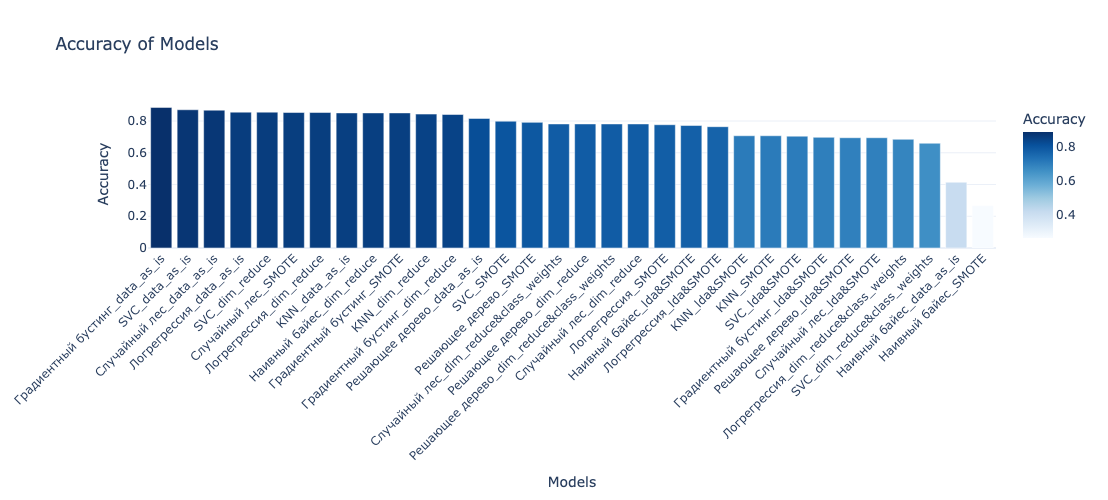

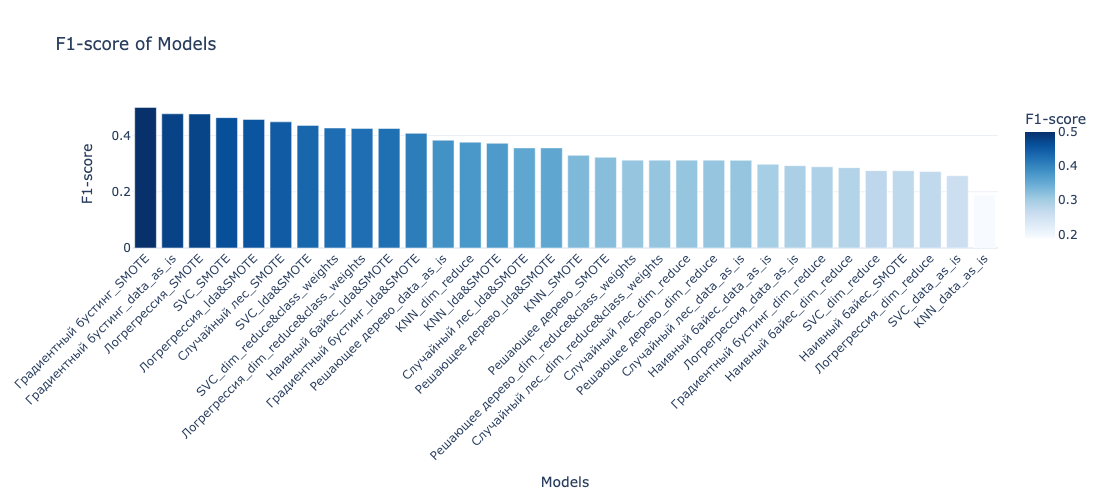

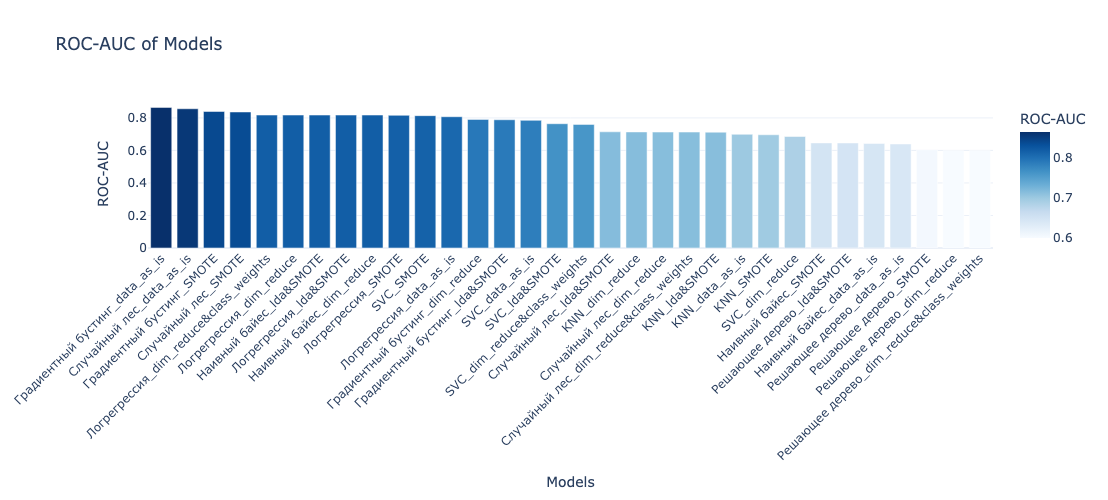

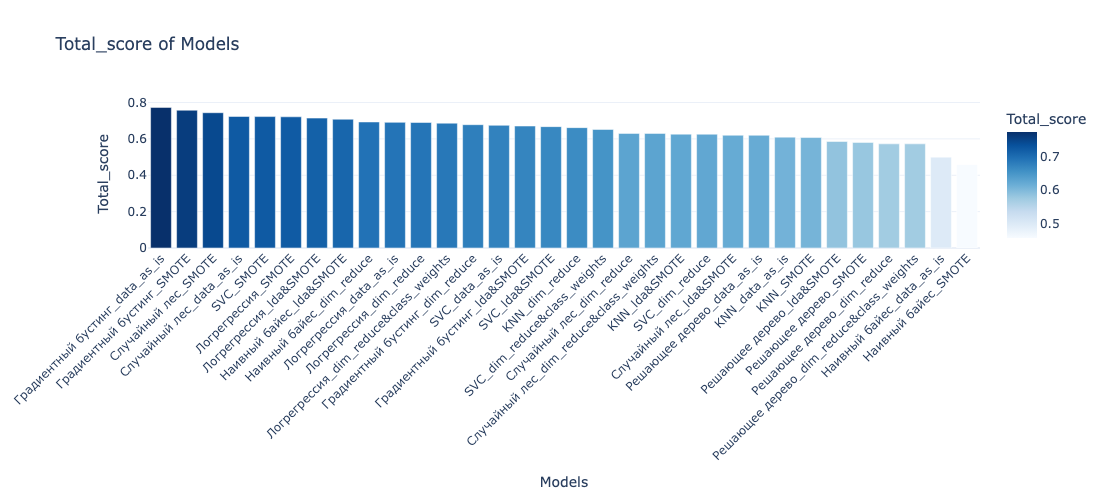

In [104]:
metrics = ['Accuracy', 'F1-score', 'ROC-AUC', 'Total_score']

# Создание графиков для каждой метрики
for metric in metrics:
    # Сортировка DataFrame по текущей метрике
    sorted_df = metrics_df.sort_values(by=metric, ascending=False)

    fig = px.bar(sorted_df, x=sorted_df.index, y=metric, 
                 title=f'{metric} of Models',
                 labels={'x': 'Models', 'y': metric},  # Измените здесь
                 color=metric,
                 color_continuous_scale=px.colors.sequential.Blues)

    # Настройка внешнего вида графика
    fig.update_layout(xaxis_title='Models',  # Установите заголовок оси X
                      yaxis_title=metric,
                      xaxis_tickangle=-45,
                      template='plotly_white',
                      width=1000, 
                      height=500
                     )

    # Отображение графика
    fig.show()

    fig.update_layout()

* Для всех вариантов обученных моделей метрика F1 не превысила 0.5.
* По Accuracy получились следующие топ-3 модели:
  * Градиентый бустинг (as is) - 0.89
  * SVC (as is) - 0.87
  * Случайный лес (as is) - 0.87
* топ-3 модели по ROC-AUC:
  * Градиентый бустинг (as is) - 0.86
  * Случайный лес (as is) - 0.86
  * Случайный лес (с оверсэмплингом) - 0.84
* топ-3 модели по суммарной оценке:
  * Градиентый бустинг (as is) - 0.77
  * Градиентный бустинг (с оверсэмплингом) - 0.76
  * Случайный лес (с оверсэмплингом) - 0.74

Таким образом, лучше всего из базовых моделей себя показали градиентный бустинг и случайный лес. Наиболее слабыми для нашего набора данных оказались Наивный байес, решающее дерево и KNN.

В качестве базовой модели для дальнейшей работы с ней, остановимся на градиентном бустинге, обучаемой на данных as is.

### 4.6. Подбор гиперпараметров и финальное обучение базовой модели

#### 4.6.1. Подбор гиперпараметров базовой модели

Для подбора гиперпараметров нашей базовой модели, обеспечивающих наибольшее качество предсказаний, будем использовать поиск по сетке - Grid Search.

В библиотеке scikit-learn для градиентного бустинга (класс GradientBoostingClassifier и GradientBoostingRegressor) используются следующие значения гиперпараметров по умолчанию:
* Количество деревьев в ансамбле `n_estimators`: 100
* Скорость обучения `learning_rate`: 0.1
* Максимальная глубина каждого дерева `max_depth`: 3
* Минимальное количество образцов, необходимое для разделения узла `min_samples_split`: 2
* Минимальное количество образцов в листе `min_samples_leaf`: 1
* Доля выборки, используемая для построения каждого дерева `subsample`: 1.0 (1.0 означает использование всех данных).
* Количество признаков, используемых для поиска наилучшего разделения `max_features`: None (None - используется все признаки.)
* Функция потерь, используемая для обучения модели `loss`: 'deviance' (для классификатора) или 'ls' (для регрессора)



Определим список основных параметров, по которым будет производиться подбор:

In [130]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Определим модель:

In [131]:
baseline = GradientBoostingClassifier(random_state=rs)

Настроим параметры Grid Search:

In [132]:
grid_search = GridSearchCV(estimator=baseline, 
                           param_grid=param_grid, 
                           scoring='roc_auc',
                           cv=3, # кол-во фолдов для кросс-валидации (деление данных на 3 части)
                           n_jobs=-1, # использование максимального кол-ва доступных процессоров
                           verbose=1  # уровень детализации вывода
                          )

Обучим модель:

In [133]:
grid_search.fit(X_train_bl1_st, y_train_bl1)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='roc_auc', verbose=1)

Получили набор лучших параметров:

In [134]:
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


Используем данные гиперпараметры для финального обучения нашей базовой модели.

#### 4.6.1. Обучение модели с подобранными параметрами

In [135]:
baseline_model = GradientBoostingClassifier(random_state=rs,
                                            learning_rate=grid_search.best_params_.get('learning_rate'), 
                                            max_depth=grid_search.best_params_.get('max_depth'), 
                                            min_samples_leaf=grid_search.best_params_.get('min_samples_leaf'),
                                            n_estimators=grid_search.best_params_.get('n_estimators'), 
                                            subsample=1)

In [136]:
baseline_model.fit(X_train_bl1_st, y_train_bl1)

GradientBoostingClassifier(n_estimators=150, random_state=42, subsample=1)

In [137]:
y_pred = baseline_model.predict(X_test_bl1_st)

In [138]:
probabilities = baseline_model.predict_proba(X_test_bl1_st)[:,1]

In [139]:
metrics_baseline = {
        'Model':  'Градиентный бустинг',
        'Accuracy': accuracy_score(y_test_bl1, y_pred),
        'F1-score': f1_score(y_test_bl1, y_pred),
        'ROC-AUC': roc_auc_score(y_test_bl1, probabilities)
    }

In [141]:
metrics_baseline

{'Model': 'Градиентный бустинг',
 'Accuracy': 0.8833746898263027,
 'F1-score': 0.4835164835164835,
 'ROC-AUC': 0.861795427670477}

В результате подбора гиперпараметров удалось значимо повысить ROC-AUC.

#### 4.6.2. Анализ значимости признаков для базовой модели

Получим датафрейм содержащий наименование признаков и их важность в моделе:

In [142]:
importances = pd.DataFrame(
    {
    'feature': X_train_bl1.columns,
    'importances': baseline_model.feature_importances_
    }
)

Выведем важность признаков в порядке убывания:

In [143]:
importances.sort_values(by='importances', ascending=False)

,feature,importances
21,expenses_per_member,0.159475
4,recency,0.134071
1,income,0.081234
10,mntgoldprods,0.070823
15,numwebvisitsmonth,0.068962
7,mntmeatproducts,0.064485
5,mntwines,0.050951
14,numstorepurchases,0.042389
23,avg_check,0.038460
13,numcatalogpurchases,0.035872


Наиболее важными признаками получились:
* `expenses_per_member` - расходы на одного члена семьи
* `recency` - количество дней, прошедших с последней покупки
* `income` - доход клиента

Наименее важными признаками оказались признаки связанные с образованием, семейным статусом и количеством детей.

### 4.7. Обучение альтернативной модели на базе CATBoost

В качестве альтернативной модели протестируем более продвинутую модель - CATBoost, которая также основана на алгоритме градиентного бустинга, но имеет встроенные инструменты обработки категориальных признаков.

**CATBoost (Categorical Boosting)** — библиотека для градиентного бустинга, разработанная Яндексом, которая специально оптимизирована для работы с категориальными признаками.

**Принцип работы:**
CATBoost также использует метод градиентного бустинга, но с акцентом на обработку категориальных данных. Основные особенности:
* Обработка категориальных признаков: CATBoost автоматически обрабатывает категориальные переменные, преобразуя их в числовые с помощью специальных методов, таких как кодирование на основе частоты.
* Симметричные деревья: Алгоритм строит симметричные деревья, что упрощает процесс обучения и делает его более стабильным.
* Устойчивость к переобучению: CATBoost включает методы, которые помогают избежать переобучения, такие как использование случайных подвыборок и регуляризация.

**Применение:**
CATBoost подходит для задач классификации и регрессии, особенно когда в данных много категориальных признаков. Он также используется в различных областях, включая финансы, маркетинг и здравоохранение.

Для обучения будем использовать датасет `df` (без кодироваия категориальных признаков). Выделим матрицу признаков и целевую переменную:

In [174]:
X = df.drop(columns=['response','dt_customer'])
y = df['response']

Разделим данные на обучающую и тестовую выборки:

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

#### 4.7.1. Подбор оптимальных параметров для обучения модели CATBoost с помощью Grid Search

Определим перечень категориальных нечисловых признаков, чтобы модель могла корректно их обработать:

In [176]:
cat_features = ['education', 'marital_status']

Определим список параметров для подбора с помощью Grid Search:

In [177]:
catboost_param_grid = {
    'iterations': [100, 200, 300, 500, 800, 900, 1000, 1200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [2, 4, 6, 8]
}

Определим модель:

In [178]:
catboost_model = CatBoostClassifier(silent=True, random_state=rs, cat_features=cat_features)

Настроим параметры Grid Search:

In [179]:
catboost_grid_search = GridSearchCV(estimator=catboost_model,
                                    param_grid=catboost_param_grid,
                                    scoring='roc_auc',
                                    cv=3,
                                    verbose=1)

Обучим модель с Grid Search:

In [180]:
catboost_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x17b29b0b0>,
             param_grid={'depth': [2, 4, 6, 8],
                         'iterations': [100, 200, 300, 500, 800, 900, 1000,
                                        1200],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2]},
             scoring='roc_auc', verbose=1)

In [181]:
print("Лучшие параметры:", catboost_grid_search.best_params_)

Лучшие параметры: {'depth': 2, 'iterations': 300, 'learning_rate': 0.05}


#### 4.7.2. Обучение модели CATBoost с подобранными параметрами

Определим модель:

In [182]:
catboost_model_gs = CatBoostClassifier(iterations=catboost_grid_search.best_params_.get('iterations'),
                                       learning_rate=catboost_grid_search.best_params_.get('learning_rate'),
                                       depth=catboost_grid_search.best_params_.get('depth'),
                                       verbose=0,
                                       random_state=rs, 
                                       cat_features=cat_features)

Обучим модель:

In [183]:
catboost_model.fit(X_train, y_train)

In [184]:
y_pred = catboost_model.predict(X_test)

In [185]:
probabilities = catboost_model.predict(X_test, prediction_type='Probability')[:,1]

In [186]:
metrics_catboost = {
        'Model':  'CATBoost',
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, probabilities)
    }

In [187]:
metrics_catboost

{'Model': 'CATBoost',
 'Accuracy': 0.8933002481389578,
 'F1-score': 0.49411764705882355,
 'ROC-AUC': 0.8658356326369729}

Существенного прироста качества модели также не произошло.

In [188]:
cb_importances = pd.DataFrame(
    {
    'feature': X_train.columns,
    'importances': catboost_model.feature_importances_
    }
)

In [189]:
cb_importances.sort_values(by='importances', ascending=False)

,feature,importances
6,recency,11.704697
17,numwebvisitsmonth,8.226886
2,marital_status,8.175106
16,numstorepurchases,7.750895
12,mntgoldprods,7.724741
3,income,5.880002
9,mntmeatproducts,4.602106
23,expenses_per_member,4.492659
15,numcatalogpurchases,4.157165
1,education,3.660380


Протестируем сокращение количества признаков за счет исключения производных признаков полученных на этапе дообогащения данных (эти признаки по умолчанию скоррелированы с признаками из которых они получены).

### 4.8. Выводы по обучению моделей для определения вероятности совершения покупки клиентом

**Выбор базовых моделей**
* В качестве базовых моделей отобраны следующие алгоритмы:
    * Логистическая регрессия
    * Метод опорных векторов (SVM) с вероятностной интерпретацией
    * Наивный байесовский классификатор
    * Дерево принятия решений для классификации
    * Случайный лес для классификации (ансамбль)
    * Градиентный бустинг для классификации (ансамбль)

**Выбор метрик качества**
* Для оценки качества прогнозов обученных моделей выбраны следующие метрики:
    * Accuracy
    * F-1
    * ROC-AUC


**Кодирование категориальных признаков**


**Обучение базовых моделей**



## 5. Кластеризация покупателей

## 6. Портрет покупателя

## 7. Общие выводы по результатам работы

**Предобработка данных**

В результате выполненной предобработки:
* Поле `dt_customer` приведено к типу даты
* Удалено 24 записи с пропусками по полю income
* Удален 201 дубликат, обнаружена ошибка с задвоенными записями и разными идентификаторами пользователей, что могло быть связано с технической ошибкой при сборе данных или при регистрации клиентов.
* Удалены три записи с аномальным годом рождения клиента (<1900 года)
* Объем данных сократился на 10% (умеренные потери)
* Добавлены шесть новых признаков:
    * `registration_age` - возраст клиента на момент регистрации в программе лояльности
    * `is_parent` - обобщенный признак наличия детей
    * `mnt_total` - общая сумма покупок по основным товарным категориям
    * `expenses_per_member` - сумма покупок в расчете на каждого члена семьи
    * `total_purchases` - общее количество покупок по разным каналам
    * `avg_check` - средний чек покупки (общая сумма / общее кол-во покупок)

**Исследовательский анализ данных**

**Описательная статистика данных**
* Большая часть клиентов имеют уровень образования Graduation (1014 клиентов) - выпускники средней школы или колледжа / бакалавры. Вторая по популярности категория - PhD (436 клиентов). Меньше всего клиентов с базовым уровнем образования (49).

* В разрезе семейного статуса больше всего клиентов находящихся в браке (781 человек), состоящих в отношениях (509 человек), и не состоящих в отношениях (435 человек). Самые малочисленные категории: Alone, Absurd и YOLO.

* Доходы клиентов варьируются от 1730 до 667 тыс. долларов в год. Медианный доход - 51.5 тыс долл./год, средний доход выше медианного за счет наличия нескольких экстремальных значений. Годовой доход 75% клиентов не превышает 68.6 тыс. долл.

* Больше всего клиентов, имеющих одного ребенка (1023), на втором месте клиенты без детей - 568, три ребенка - самое редкое явление - всего 45 клиентов.

* `complain` -  признак, указывающий на факт жалоб со стороны клиента. Клиентов, которые направляли жалобы всего 19 человек (менее 1%). Такой признак не несет информации, так как по сути является в 99% нулевым столбцом.

* Есть группа клиентов, у которых траты в рассмотренных категориях значительно превышают средний уровень. Это может быть полезным признаком при проведении кластеризации клиентов. Скорее всего это могут быть либо состоятельные клиенты либо клиенты имеющие большую семью.

* Покупка товаров непосредственно в магазине - наиболее популярный способ совершения покупок (около 6 покупок на клиента). Второй по популярности канал - покупки на сайте компании (около 4 покупок на клиента).

* В среднем клиенты посещают веб-сайт компании около 5 раз в месяц.

* Чаще всего регистрировались клиенты в возрасте 34-50 лет и 54-62 года. Средний возраст клиента на момент регистрации - 44 года. Самому младшему клиенту на момент регистрации было 16 лет, самому старшему 73 года.


**Средние значения признаков по группам принявших и не принявших предложение о покупке клиентов**
Для краткости обозначим клиентов, совершающих целевое действие (принимающих предложение и совершающих покупку) обозначим "группа 1", клиентов, которые не совершают целевых действий обозначим "группа 0".

**Существенные различия по группам видны у следующих показателей:**
* Группа показателей состава семьи:
    * Клиенты являющиеся родителями, имеющие большее количество маленьких детей и подростков чаще попадают в группу 0

* Группа показателей расходов на основные товарные категории:
    * Клиенты из группы 1 в среднем тратят боольше денег на основные товарные категории.
    * Средние расходы в расчете на каждого члена семьи также выше у клиентов из группы 1 (801 против 355 долл.)

* Группа показателей каналов продаж:
    * клиенты из группы 1 чаще заказывают товары по каталогу (4 против 2)
    * клиенты из группы 1 чаще покупают на сайте (5 против 4)
    * клиенты из группы 1 в целом чаще совершают покупки (15 против 12)

* У клиентов из группы 1 средний чек выше (52 долл. против 31)
* Клиенты из группы 1 чаще совершают покупки - 1 раз в 35 дней, у клиентов из группы 0  - 1 р в 51 день.
* Клиенты из группы 1 зарабатывают в среднем на 10 тыс.долл в год больше.

**Видимые отличия отсутсвуют или незначительны по следующим признакам**:
* жалобы
* покупки со скидкой
* покупки непосредственно в магазине
* количество посещений сайта за последний месяц
* возраст клиента на момент регистрации
* год рождения

**Корреляция признаков датасета**

* Чем выше доходы клиента тем выше траты на все товарные категории и количество совершенных покупок по всем каналам
* Клиенты с детьми чаще совершают покупки со скидкой
* Не удалось обнаружить положительной корреляции между целевой переменной и другими признаками в датасете
* Признак родительства и особенно наличие маленьких детей находится в отрицательной связи с доходами, тратами на основные товарные категории и прочими производными от них показателями.
* Не удалось обнаружить значимой отрицательной корреляции целевой переменной с другими признаками датасета.
* Ни один признак в датасете не имеет значимой корреляции с целевой переменной `response`.


**Определение вероятности покупки**